# Proyek Analisis Data: **Air Quality Dataset**
- **Nama:** Josephine Dermawan
- **Email:** jojo.josephined@gmail.com
- **ID Dicoding:** axiomjo

## Menentukan Pertanyaan Bisnis

- Kapan polutan melonjak naik?
- Adakah korelasi antara polutan dan waktu?
- Sesuaikah data dengan WHO global air quality guidelines?

---
#### 🌻🌻**Insight:**  🌻🌻

| kriteria  | detail  |
|-----------|-----------|
| S     | ttg polusi udara (particulate matter, exhaust kendaraan SO2	NO2	CO	O3	)   |
| M     | konsentrasi polutannya   |
| A    | warn yg polusinya parah   |
| R    | pake standar WHO 2021   |
| T    | periode 2013 -2017   |



## Import Semua Packages/Library yang Digunakan

In [1]:
# %pip install numpy pandas scipy matplotlib seaborn jupyter

In [2]:

'''
\(* u*) this part just imports n renames the library so they'll be easier to call later wkwkwkwk

'''

import pandas as pd

import numpy as np
import scipy as sp

import matplotlib.pyplot as mpl
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap

import seaborn as sb


#### 🌼🌼**Insight:**  🌼🌼  
pandas = dataframe

numpy = arrays, math operations  
scipy = moar advanced math ops  

matplotlib.pyplot = dataviz  
matplotlib.colors = custom color gradient  

seaborn = dataviz  

## Data Wrangling

### Gathering Data  

---
🌱 🌿🌱 🌿🌱 🌿🌱 🌿🌱 🌿🌱 🌿🌱 🌿🌱 🌿🌱 🌿🌱 🌿🌱 🌿  
> - dapetin baseline dari executive summary WHO  
>  [link pdfnya dari who](https://iris.who.int/bitstream/handle/10665/345334/9789240034433-eng.pdf)

> - ambil data semua stasiun dari **Air Quality Dataset**  
>  [link dari instruksi submission dicoding](https://github.com/marceloreis/HTI/tree/master)  
>  [link dari kaggle](https://www.kaggle.com/datasets/sid321axn/beijing-multisite-airquality-data-set)

![screenshot dari guidelines WHO](mo_pamer_dataviz/GUIDELINES.png)

In [3]:
'''
           PM2.5 PM10 O3 NO2 SO2 CO
ok    AQG
  |   IT4
  |   IT3
  v   IT2
horor IT1
'''

dari_pdf = {
   #  Interim Target 1,	Interim Target 2,	Interim Target 3,	Interim Target 4,	AirQualityGuidelines Level
    "PM2.5": [75, 50, 37.5,	25,	15],  # mikrogram/ meter kubik
    "PM10": [150,100, 75, 50, 45],    # mikrogram/ meter kubik
    "NO2": [120,50,None,None,25],      # mikrogram/ meter kubik
    "SO2": [125,50,None,None,40],     # mikrogram/ meter kubik
    "CO": [7,None,None,None,4],        # miligram/ meter kubik... WHYYYY WHO, WHYYYYY?
    "O3": [160, 120, None,None, 100]   # mikrogram/ meter kubik...actually dia cara ngukurnya beda, aku ganangkep, so kusimplify jadi gini. cara proper ada di halaman 4, sidenote b guideline who
}
standar_who = pd.DataFrame(dari_pdf)
standar_who

PM2.5  PM10    NO2    SO2   CO     O3
0   75.0   150  120.0  125.0  7.0  160.0
1   50.0   100   50.0   50.0  NaN  120.0
2   37.5    75    NaN    NaN  NaN    NaN
3   25.0    50    NaN    NaN  NaN    NaN
4   15.0    45   25.0   40.0  4.0  100.0

In [4]:
"""
kolom tabelnya sama semua :o

OPTION 1 : pake relative(?) path or whatever this is. litereli manggil file yg ada di folder sebelah. wuaw we can do that???
ambil path dari klik kanan, copy path, trus apus depannya sampe folder data krn folder data se-level sm file jupyternya
"""

stasiun1_Ao = pd.read_csv("data/PRSA_Data_Aotizhongxin_20130301-20170228.csv")
stasiun2_Ch = pd.read_csv("data/PRSA_Data_Changping_20130301-20170228.csv")
stasiun3_Di = pd.read_csv("data/PRSA_Data_Dingling_20130301-20170228.csv")
stasiun4_Do = pd.read_csv("data/PRSA_Data_Dongsi_20130301-20170228.csv")
stasiun5_Ga = pd.read_csv("data/PRSA_Data_Guanyuan_20130301-20170228.csv")
stasiun6_Gc = pd.read_csv("data/PRSA_Data_Gucheng_20130301-20170228.csv")
stasiun7_Hu = pd.read_csv("data/PRSA_Data_Huairou_20130301-20170228.csv")
stasiun8_No = pd.read_csv("data/PRSA_Data_Nongzhanguan_20130301-20170228.csv")
stasiun9_Sh = pd.read_csv("data/PRSA_Data_Shunyi_20130301-20170228.csv")
stasiun10_Ti = pd.read_csv("data/PRSA_Data_Tiantan_20130301-20170228.csv")
stasiun11_Wl = pd.read_csv("data/PRSA_Data_Wanliu_20130301-20170228.csv")
stasiun12_Ws = pd.read_csv("data/PRSA_Data_Wanshouxigong_20130301-20170228.csv")


"""
OPSI 2 : manggil file csv yg udh ku-reupload ke githubku.
ambil link dari tombol "Raw"

area1_Ao = pd.read_csv("https://raw.githubusercontent.com/axiomjo/Jo-s-First-Dataviz-Dashboard-Using-Jupyter-Notebook/refs/heads/main/submission-dicoding-analisis-data/data/air%20quality/PRSA_Data_Aotizhongxin_20130301-20170228.csv")
area2_Ch = pd.read_csv("https://raw.githubusercontent.com/axiomjo/Jo-s-First-Dataviz-Dashboard-Using-Jupyter-Notebook/refs/heads/main/submission-dicoding-analisis-data/data/air%20quality/PRSA_Data_Changping_20130301-20170228.csv")
area3_Di = pd.read_csv("https://raw.githubusercontent.com/axiomjo/Jo-s-First-Dataviz-Dashboard-Using-Jupyter-Notebook/refs/heads/main/submission-dicoding-analisis-data/data/air%20quality/PRSA_Data_Dingling_20130301-20170228.csv")
area4_Do = pd.read_csv("https://raw.githubusercontent.com/axiomjo/Jo-s-First-Dataviz-Dashboard-Using-Jupyter-Notebook/refs/heads/main/submission-dicoding-analisis-data/data/air%20quality/PRSA_Data_Dongsi_20130301-20170228.csv")
area5_Ga = pd.read_csv("https://raw.githubusercontent.com/axiomjo/Jo-s-First-Dataviz-Dashboard-Using-Jupyter-Notebook/refs/heads/main/submission-dicoding-analisis-data/data/air%20quality/PRSA_Data_Guanyuan_20130301-20170228.csv")
area6_Gc = pd.read_csv("https://raw.githubusercontent.com/axiomjo/Jo-s-First-Dataviz-Dashboard-Using-Jupyter-Notebook/refs/heads/main/submission-dicoding-analisis-data/data/air%20quality/PRSA_Data_Gucheng_20130301-20170228.csv")
area7_Hu = pd.read_csv("https://raw.githubusercontent.com/axiomjo/Jo-s-First-Dataviz-Dashboard-Using-Jupyter-Notebook/refs/heads/main/submission-dicoding-analisis-data/data/air%20quality/PRSA_Data_Huairou_20130301-20170228.csv")
area8_No = pd.read_csv("https://raw.githubusercontent.com/axiomjo/Jo-s-First-Dataviz-Dashboard-Using-Jupyter-Notebook/refs/heads/main/submission-dicoding-analisis-data/data/air%20quality/PRSA_Data_Nongzhanguan_20130301-20170228.csv")
area9_Sh = pd.read_csv("https://raw.githubusercontent.com/axiomjo/Jo-s-First-Dataviz-Dashboard-Using-Jupyter-Notebook/refs/heads/main/submission-dicoding-analisis-data/data/air%20quality/PRSA_Data_Shunyi_20130301-20170228.csv")
area10_Ti = pd.read_csv("https://raw.githubusercontent.com/axiomjo/Jo-s-First-Dataviz-Dashboard-Using-Jupyter-Notebook/refs/heads/main/submission-dicoding-analisis-data/data/air%20quality/PRSA_Data_Tiantan_20130301-20170228.csv")
area11_Wl = pd.read_csv("https://raw.githubusercontent.com/axiomjo/Jo-s-First-Dataviz-Dashboard-Using-Jupyter-Notebook/refs/heads/main/submission-dicoding-analisis-data/data/air%20quality/PRSA_Data_Wanliu_20130301-20170228.csv")
area12_Ws = pd.read_csv("https://raw.githubusercontent.com/axiomjo/Jo-s-First-Dataviz-Dashboard-Using-Jupyter-Notebook/refs/heads/main/submission-dicoding-analisis-data/data/air%20quality/PRSA_Data_Wanshouxigong_20130301-20170228.csv")
"""
stasiun12_Ws.head(2)

No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    9.0   9.0  6.0  17.0  200.0  62.0   0.3   
1   2  2013      3    1     1   11.0  11.0  7.0  14.0  200.0  66.0  -0.1   

     PRES  DEWP  RAIN   wd  WSPM        station  
0  1021.9 -19.0   0.0  WNW   2.0  Wanshouxigong  
1  1022.4 -19.3   0.0  WNW   4.4  Wanshouxigong

In [5]:
""" 
supaya gampang, jadiin satu n tampilin
"""
data_semua_area = pd.concat([stasiun1_Ao,stasiun2_Ch,stasiun3_Di,stasiun4_Do,stasiun5_Ga,stasiun6_Gc,stasiun7_Hu,stasiun8_No,stasiun9_Sh,stasiun10_Ti,stasiun11_Wl,stasiun12_Ws])
data_semua_area

No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  \
0          1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0   
1          2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0   
2          3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0   
3          4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0   
4          5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0   
...      ...   ...    ...  ...   ...    ...   ...   ...   ...    ...   ...   
35059  35060  2017      2   28    19   11.0  32.0   3.0  24.0  400.0  72.0   
35060  35061  2017      2   28    20   13.0  32.0   3.0  41.0  500.0  50.0   
35061  35062  2017      2   28    21   14.0  28.0   4.0  38.0  500.0  54.0   
35062  35063  2017      2   28    22   12.0  23.0   4.0  30.0  400.0  59.0   
35063  35064  2017      2   28    23   13.0  19.0   4.0  38.0  600.0  49.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM        station  
0      -0.7  1023.0 -18.8   0.0  NNW   4.4   Aotizhongxin  
1      -1.1  1023.2 -18.2   0.0    N   4.7   Aotizhongxin  
2      -1.1  1023.5 -18.2   0.0  NNW   5.6   Aotizhongxin  
3      -1.4  1024.5 -19.4   0.0   NW   3.1   Aotizhongxin  
4      -2.0  1025.2 -19.5   0.0    N   2.0   Aotizhongxin  
...     ...     ...   ...   ...  ...   ...            ...  
35059  12.5  1013.5 -16.2   0.0   NW   2.4  Wanshouxigong  
35060  11.6  1013.6 -15.1   0.0  WNW   0.9  Wanshouxigong  
35061  10.8  1014.2 -13.3   0.0   NW   1.1  Wanshouxigong  
35062  10.5  1014.4 -12.9   0.0  NNW   1.2  Wanshouxigong  
35063   8.6  1014.1 -15.9   0.0  NNE   1.3  Wanshouxigong  

[420768 rows x 18 columns]

#### 🌱 🌿 **Insight:**  🌱 🌿
> - OH! ada **12 stasiun**
> - ada **6 polutan**, semuanya pake satuan mikrogram per meter kubik

> - TRUS, periode waktu tiap station **PLEK SAMA SEMUA** ada 35064 datapoints

> - udh digabung di dataframe `data_semua_area` 
>
> 
>|No|year|month|	day	|hour|	PM2.5	|PM10|	SO2	|NO2	|CO	|O3	|TEMP	|PRES|	DEWP|	RAIN|	wd	|WSPM	|station|
>|--|----|-----|-----|----|----------|----|------|-------|---|---|-------|----|------|-------|-------|-----|-----|
>|0| | |	 	||		||		|	|	|	|	||	|	|		|	||


> baseline WHO ada di `standar_who` n masih perlu diberesin
>|PM2.5|PM10|NO2|SO2|CO|O3|
>|---------|--------------|----------------|--------------------|----------------|----------------------|
>|75.0|150|120.0|125.0|	7.0|60|



### Assessing Data
---
🌱🌿🌱 🌿🌱 🌿🌱 🌿🌱 🌿🌱 🌿🌱 🌿🌱 🌿🌱 🌿🌱 🌿🌱 🌿  

> 1. liat isi dataframenya kayak apa 
> 2. cek masalah tipikal di data


#### ASSES `data_semua_area`

🌱 🌿🌱  1. liat isi dataframenya kayak apa 🌱 🌿🌱 

In [6]:
#minta ingfo ttg jumlah data per kolom masse (*-*)/
data_semua_area.info()

<class 'pandas.core.frame.DataFrame'>
Index: 420768 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 61.0+ MB


🌿bau-bau ada yg kosong..., tapi tipe datanya polutanya waras sih, ohwell 🌱  

In [7]:
data_semua_area.describe(include="all")

No           year          month            day  \
count   420768.000000  420768.000000  420768.000000  420768.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean     17532.500000    2014.662560       6.522930      15.729637   
std      10122.116943       1.177198       3.448707       8.800102   
min          1.000000    2013.000000       1.000000       1.000000   
25%       8766.750000    2014.000000       4.000000       8.000000   
50%      17532.500000    2015.000000       7.000000      16.000000   
75%      26298.250000    2016.000000      10.000000      23.000000   
max      35064.000000    2017.000000      12.000000      31.000000   

                 hour          PM2.5           PM10            SO2  \
count   420768.000000  412029.000000  414319.000000  411747.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean        11.500000      79.793428     104.602618      15.830835   
std          6.922195      80.822391      91.772426      21.650603   
min          0.000000       2.000000       2.000000       0.285600   
25%          5.750000      20.000000      36.000000       3.000000   
50%         11.500000      55.000000      82.000000       7.000000   
75%         17.250000     111.000000     145.000000      20.000000   
max         23.000000     999.000000     999.000000     500.000000   

                  NO2             CO             O3           TEMP  \
count   408652.000000  400067.000000  407491.000000  420370.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean        50.638586    1230.766454      57.372271      13.538976   
std         35.127912    1160.182716      56.661607      11.436139   
min          1.026500     100.000000       0.214200     -19.900000   
25%         23.000000     500.000000      11.000000       3.100000   
50%         43.000000     900.000000      45.000000      14.500000   
75%         71.000000    1500.000000      82.000000      23.300000   
max        290.000000   10000.000000    1071.000000      41.600000   

                 PRES           DEWP           RAIN      wd           WSPM  \
count   420375.000000  420365.000000  420378.000000  418946  420450.000000   
unique            NaN            NaN            NaN      16            NaN   
top               NaN            NaN            NaN      NE            NaN   
freq              NaN            NaN            NaN   43335            NaN   
mean      1010.746982       2.490822       0.064476     NaN       1.729711   
std         10.474055      13.793847       0.821004     NaN       1.246386   
min        982.400000     -43.400000       0.000000     NaN       0.000000   
25%       1002.300000      -8.900000       0.000000     NaN       0.900000   
50%       1010.400000       3.100000       0.000000     NaN       1.400000   
75%       1019.000000      15.100000       0.000000     NaN       2.200000   
max       1042.800000      29.100000      72.500000     NaN      13.200000   

             station  
count         420768  
unique            12  
top     Aotizhongxin  
freq           35064  
mean             NaN  
std              NaN  
min              NaN  
25%              NaN  
50%              NaN  
75%              NaN  
max              NaN

🌿tanggalan waras  
yg polutan... rata2 sm max valuenya jauh2 bgt ya... afkh outlier???
🌱  

---   
 
🌱 🌿🌱  2. cek masalah tipikal di data 🌱 🌿🌱   
- **missing value**
- invalid (... ini engga coz i dunno regex yet)
- **duplicate**
- inaccurate (...eh.. ini engga, aku pasrah sm data dari sensor)
- inconsistent (...ini engga juga, dunno how to find out yet)
- **outlier**

In [8]:
"""
(;0;) cek yg bermasalah:
- missing value
"""
data_yg_ilang = data_semua_area.isnull().sum()
# bisa pake data_semua_area.isna().sum() juga.


🌱 karena aku mblenek liat angka, sekalian di-dataviz-in aja ya walopun blom EDA 🌱 


In [9]:
# rumus matem nyari persentase
persentase_data_yg_ilang = (data_yg_ilang / len(data_semua_area)) * 100

# bikin dataframe
temp_dataframe = pd.DataFrame({
    "koshong": data_yg_ilang,
    "persen koshong": persentase_data_yg_ilang
}).reset_index()

# namain ulang kolomnya
temp_dataframe.columns = ["Nama Kolom", "Data Ilang", "Persentase Ilang"]

<Figure size 1000x500 with 0 Axes>

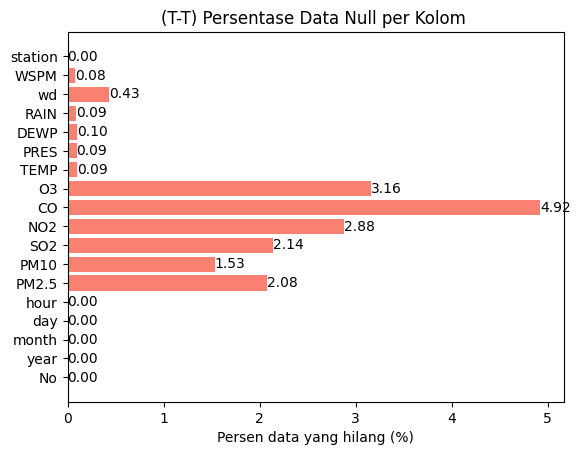

In [10]:
# dataviz diagram batang nyamping
mpl.figure(figsize=(10, 5))
fig, ax = mpl.subplots()

hbars = ax.barh(y=temp_dataframe["Nama Kolom"], width=temp_dataframe["Persentase Ilang"], height=0.8, color="salmon")

ax.set_xlabel("Persen data yang hilang (%)")
ax.set_title("(T-T) Persentase Data Null per Kolom ")
ax.bar_label(hbars, fmt='%.2f')

mpl.show()

In [11]:
"""
(;0;) cek yg bermasalah:
- duplicate
"""
data_semua_area.duplicated().sum() 

0

🌱 karena mau liat outliernya  
sekalian dataviz aja supaya enak :D 
🌱 

In [12]:
"""
(;0;) cek yg bermasalah:
- outlier
"""

#dataframe pandasnya convert ke numpy dulu (tapi sekalian di-drop yg null supaya g error)
#trus simpen data per stasiun di dictionary krn indeksnya string

key_polutan_data = ["CO","NO2","O3", "PM10", "PM2.5", "SO2" ]

temp_outlier_polutan = {}

for tiap_x in key_polutan_data:
    temp_outlier_polutan[tiap_x] = pd.to_numeric(data_semua_area[tiap_x], errors='coerce'  ).dropna().to_numpy()

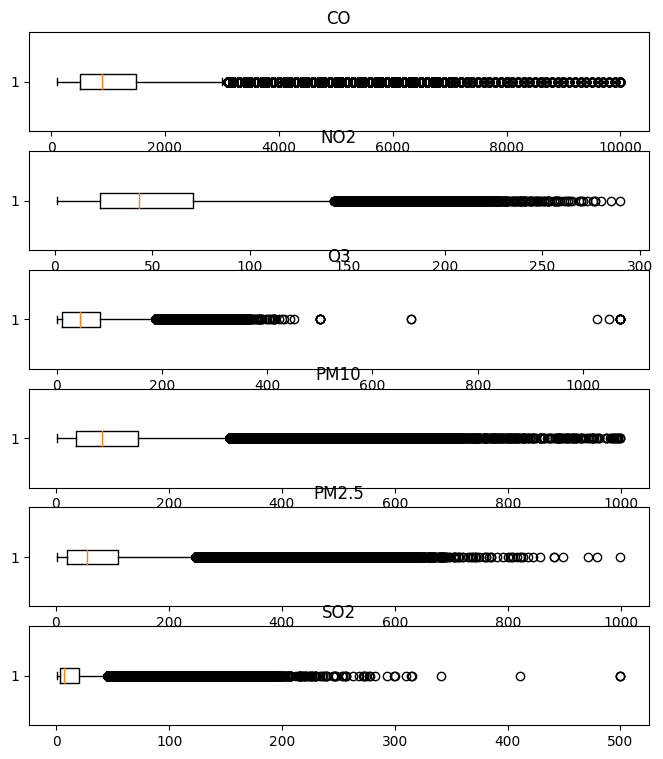

In [13]:
#subplot bejejer ke bawah matplotlib
baris = len(key_polutan_data)  
fig, axes = mpl.subplots(baris, 1, figsize=(8, baris * 1.5))

#boxplot
for i, tiap_x in enumerate(key_polutan_data):
        axes[i].boxplot(temp_outlier_polutan[tiap_x], vert=False)
        axes[i].set_title(tiap_x)

🌱 uhhh... outliernya knp kyk masih nyambung sm datanya??? kok g kayak outlier?  
fine...  
karena outlier lebih kontekstual klo per polutan per kota...
i need to know per polutan per kota... 🌿

In [14]:
#dapetin semua kategori yg kupingin
key_stasiun_data = data_semua_area["station"].unique()
key_polutan_data = ["CO","NO2","O3", "PM10", "PM2.5", "SO2" ]

#bikin subplot, jenis stasiun ke samping, jenis polutan ke bawah.
kolom = len(key_stasiun_data)
baris = len(key_polutan_data)  
fig, axes = mpl.subplots(kolom, baris,  figsize=(kolom * 10,baris * 12.5))

outlier_data_semua = []

#looping per stasiun, per polutan
for i, tiap_stasiun in enumerate(key_stasiun_data):
    stasiun_data = data_semua_area[data_semua_area["station"] == tiap_stasiun]

    for j, tiap_polutan in enumerate(key_polutan_data):
        stasiun_polutan_data = pd.to_numeric(stasiun_data[tiap_polutan], errors='coerce').dropna().to_numpy()

        Q1 = np.percentile(stasiun_polutan_data, 25)
        Q3 = np.percentile(stasiun_polutan_data, 75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_temp = stasiun_polutan_data[(stasiun_polutan_data < lower_bound) | (stasiun_polutan_data > upper_bound)]

        for tiap_outlier in outlier_temp:
            outlier_data_semua.append({"station": tiap_stasiun, "pollutant": tiap_polutan, "outlier_value": tiap_outlier})


        #dataviz boxplot
        axes[i, j].boxplot(outlier_temp, vert=False)
        axes[i,j].set_title(f"{tiap_stasiun} - {tiap_polutan}")

mpl.tight_layout()
mpl.show()

#i know its sooo small...
#if curious with the viz result, double click to zoom it.


In [15]:
outlier_dataframe = pd.DataFrame(outlier_data_semua)

temp_outlier = outlier_dataframe.groupby(["station","pollutant"]).count()
total_data = data_semua_area.station.value_counts().unique()[0]

temp_outlier["persen_outlier"]= (temp_outlier["outlier_value"]/ total_data )*100

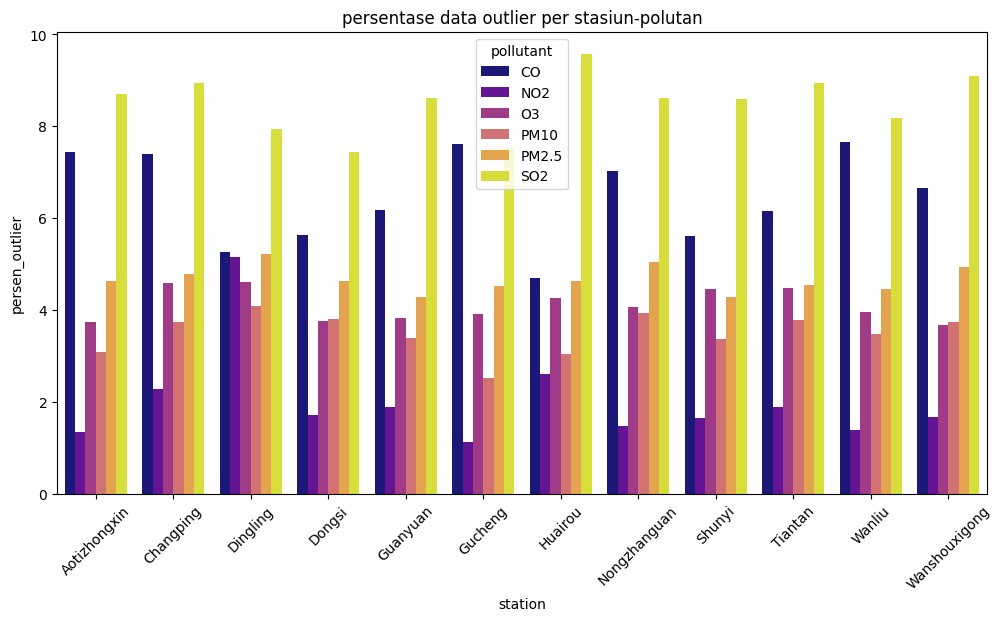

In [16]:
# palet warna plasma

plasma_colors = [mcolors.to_hex(c) for c in mpl.cm.plasma(np.linspace(0, 1, len(key_polutan_data)))]
pollutant_color_map = dict(zip(key_polutan_data, plasma_colors))

#bar plot per poutan - stasiun
mpl.figure(figsize=(12,6))

sb.barplot(data=temp_outlier, x="station", y="persen_outlier", hue="pollutant", palette= pollutant_color_map)

mpl.title("persentase data outlier per stasiun-polutan")
mpl.xticks(rotation=45)
mpl.show()

🌱 HAH OUTLIERNYA BANYAK YG LEBIH DARI 2 PERSEN?! uh... coba arsir area yg outlier i guess?    🌿

In [17]:
outlier_data_semua = pd.DataFrame(outlier_data_semua)

# dapetin minmax per polutan per stasiun
outlier_minmax_key = outlier_data_semua.groupby(["station", "pollutant"])["outlier_value"].agg(["min", "max"]).reset_index()

# namain ulang
outlier_minmax_key.rename(columns={"min": "min_outlier", "max": "max_outlier"}, inplace=True)

print(outlier_minmax_key)

          station pollutant  min_outlier  max_outlier
0    Aotizhongxin        CO     3100.000      10000.0
1    Aotizhongxin       NO2      161.000        290.0
2    Aotizhongxin        O3      193.851        423.0
3    Aotizhongxin      PM10      331.000        984.0
4    Aotizhongxin     PM2.5      253.000        898.0
..            ...       ...          ...          ...
67  Wanshouxigong       NO2      151.000        251.0
68  Wanshouxigong        O3      194.000        358.0
69  Wanshouxigong      PM10      327.000        961.0
70  Wanshouxigong     PM2.5      256.000        999.0
71  Wanshouxigong       SO2       49.000        411.0

[72 rows x 4 columns]


In [18]:

data_semua_area['timestamp'] = pd.to_datetime(data_semua_area[['year', 'month', 'day', 'hour']])

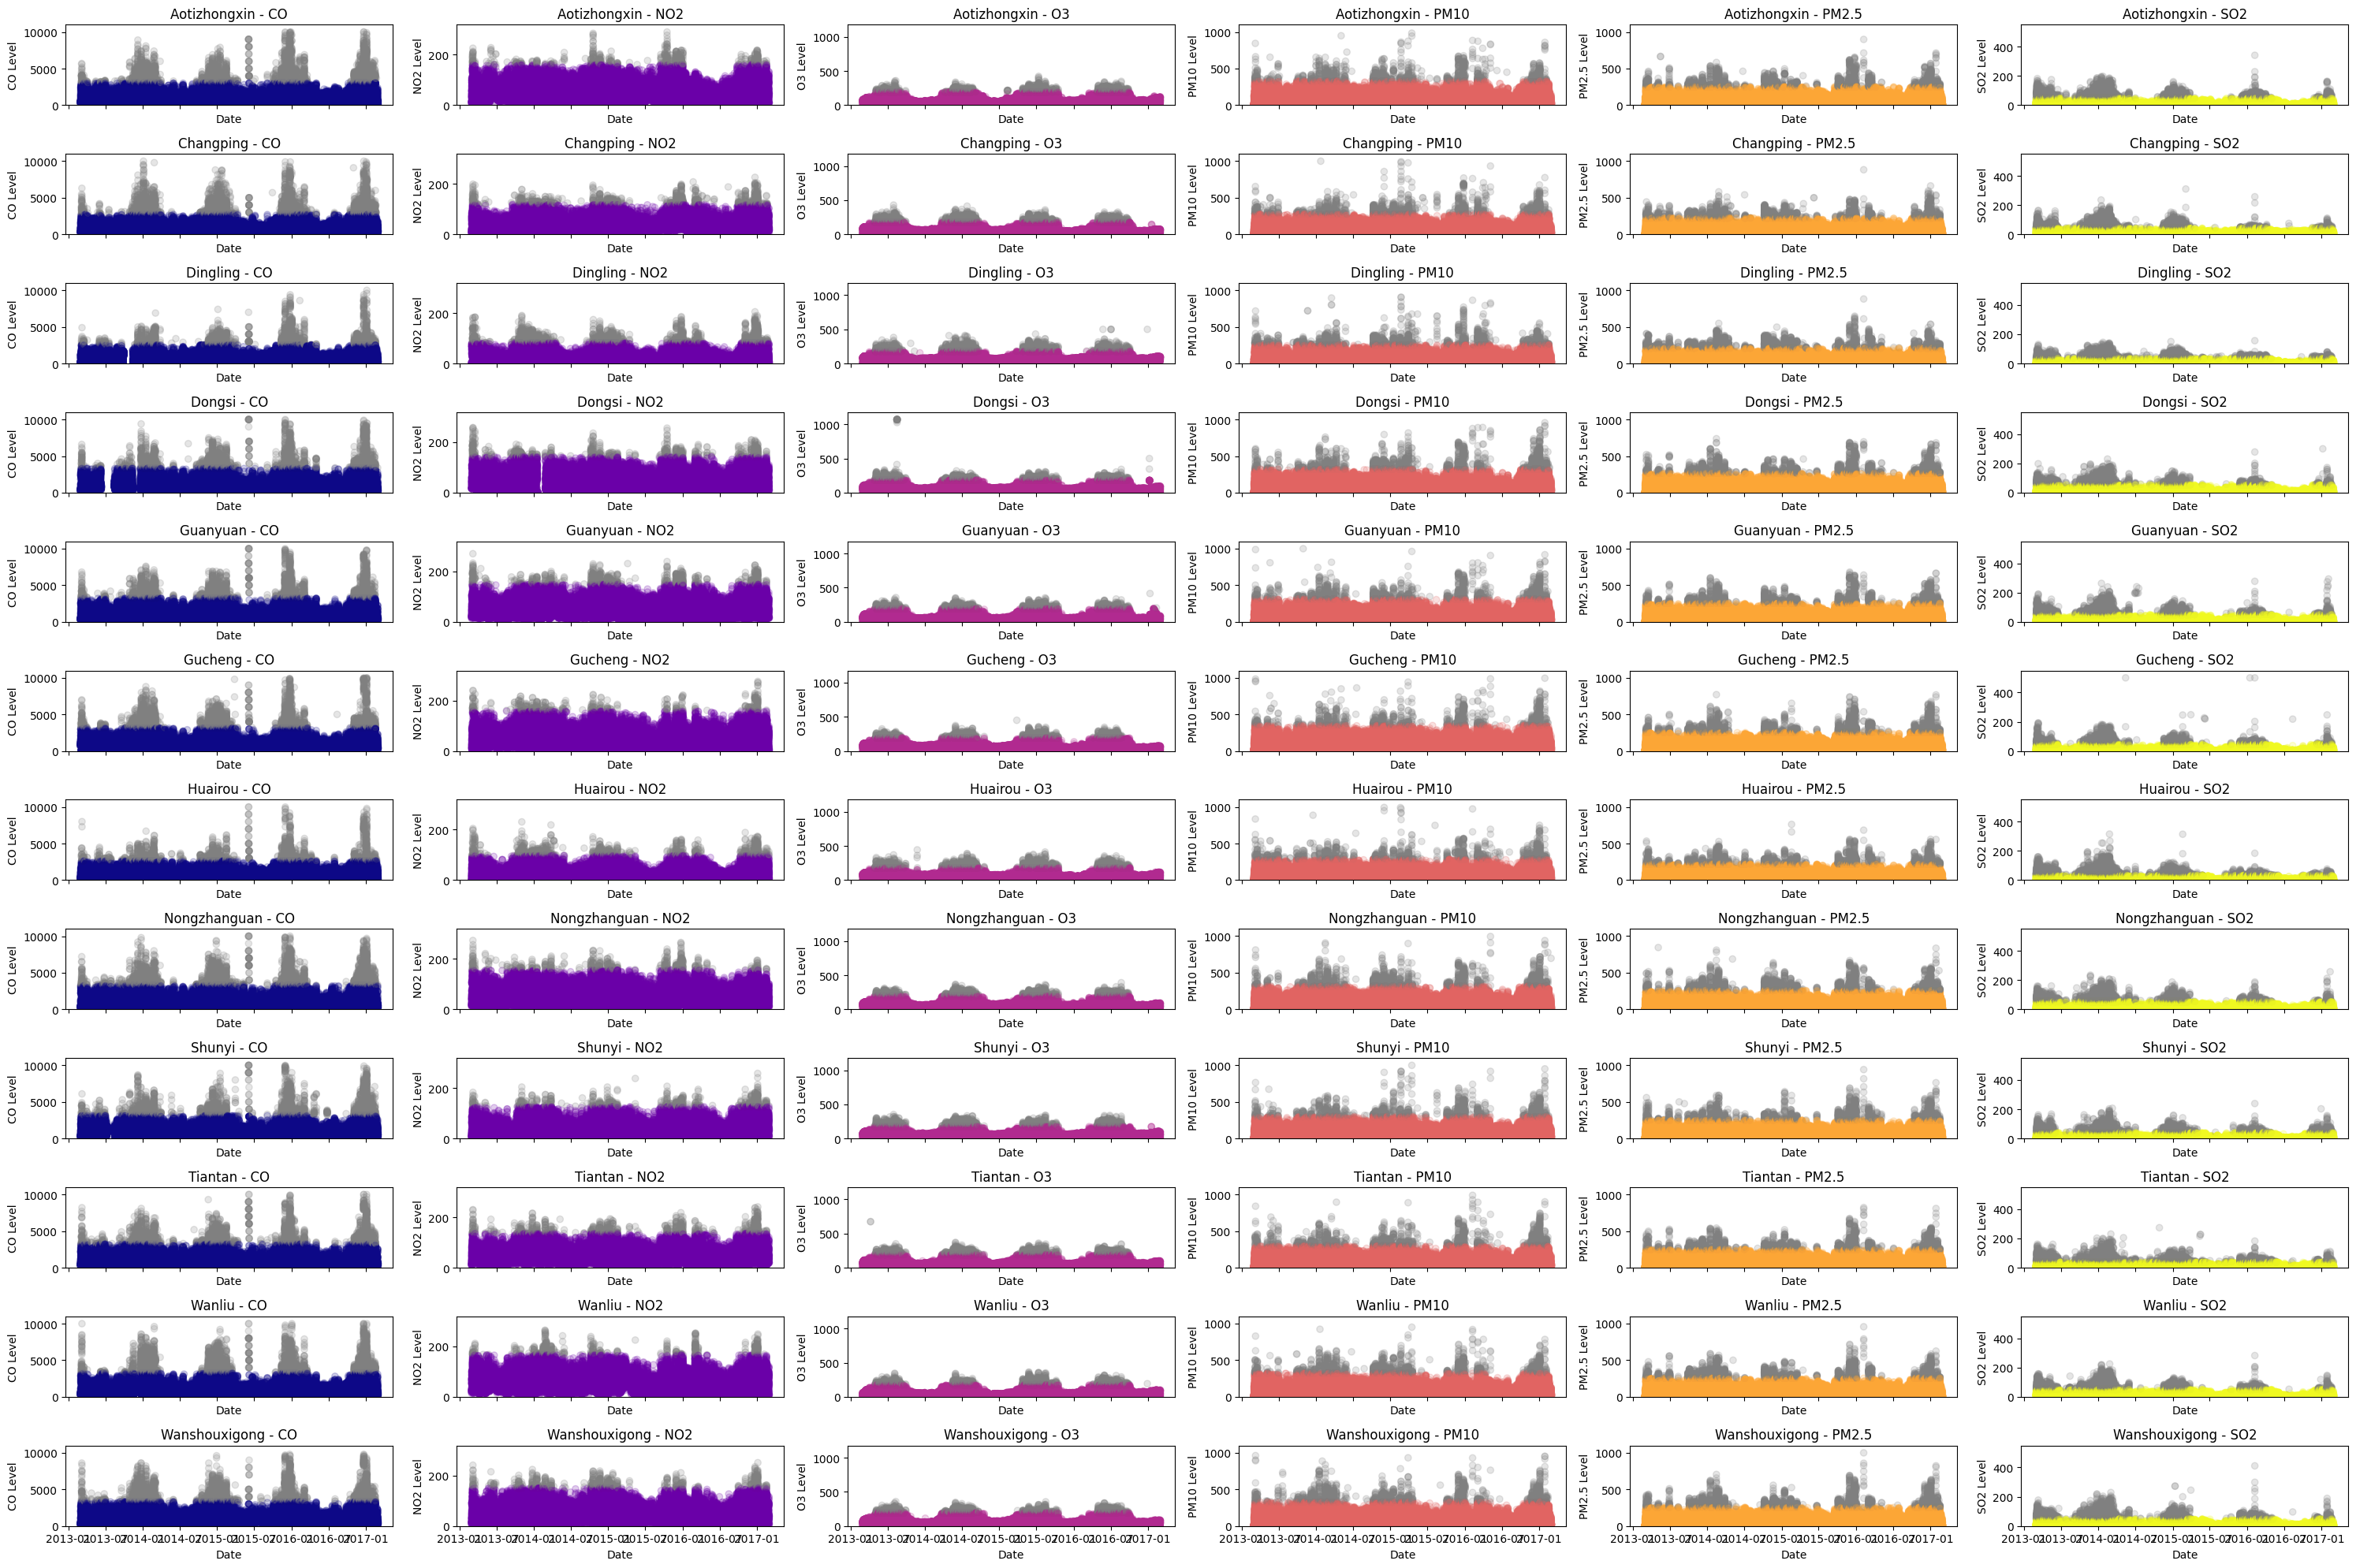

In [19]:
"""
LEMME SEE WHERE THE OUTLIERS AREEEEE
"""

# supaya urutan konsisten
key_stasiun_data = data_semua_area["station"].unique()
key_polutan_data = ["CO", "NO2", "O3", "PM10", "PM2.5", "SO2"]

# color map custom YEYEYEYYEY
plasma_colors = [mcolors.to_hex(c) for c in mpl.cm.plasma(np.linspace(0, 1, len(key_polutan_data)))]
pollutant_color_map = dict(zip(key_polutan_data, plasma_colors))

# dapetin nilai max tiap polutan supaya sumbunya samaan per polutan
pollutant_max_values = {
    polutan: data_semua_area[polutan].max() for polutan in key_polutan_data
}

# Data Visualization
fig, axes = mpl.subplots(len(key_stasiun_data), len(key_polutan_data), figsize=(30, 20), sharex=True)

for i, tiap_stasiun in enumerate(key_stasiun_data):
    data_per_stasiun = data_semua_area[data_semua_area["station"] == tiap_stasiun]
    
    for j, tiap_polutan in enumerate(key_polutan_data):
        ax = axes[i, j] 
        data_values = data_per_stasiun[["timestamp", tiap_polutan]].dropna()
        
        # Get outlier thresholds
        min_threshold = (
            outlier_minmax_key[(outlier_minmax_key["pollutant"] == tiap_polutan) & 
                               (outlier_minmax_key["station"] == tiap_stasiun)]
            ["min_outlier"].values[0]
        )
        max_threshold = (
            outlier_minmax_key[(outlier_minmax_key["pollutant"] == tiap_polutan) & 
                               (outlier_minmax_key["station"] == tiap_stasiun)]
            ["max_outlier"].values[0]
        )
        
        # Identify outliers
        is_outlier = (min_threshold <= data_values[tiap_polutan] ) & (data_values[tiap_polutan] <= max_threshold)
        
        # Assign colors
        normal_color = pollutant_color_map[tiap_polutan]
        outlier_color = "grey"
        colors = [outlier_color if outlier else normal_color for outlier in is_outlier]
        
        # Scatter plot
        ax.scatter(data_values["timestamp"], data_values[tiap_polutan], c=colors, alpha=0.2)
        ax.set_ylim(0, pollutant_max_values[tiap_polutan] * 1.1)  # 10% padding
        ax.set_title(f"{tiap_stasiun} - {tiap_polutan}")
        ax.set_xlabel("Date")
        ax.set_ylabel(f"{tiap_polutan} Level")

mpl.tight_layout()

In [20]:
#fig.savefig("mo_pamer_dataviz/1_scatterplot_masing_masing", dpi=300, bbox_inches='tight')
mpl.show()

🌱 KARENA OUTLIERNYA PENTING, NTAR GA KU IMPUTATE 🌱

#### ASSES `standar_who`

In [21]:
standar_who.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM2.5   5 non-null      float64
 1   PM10    5 non-null      int64  
 2   NO2     3 non-null      float64
 3   SO2     3 non-null      float64
 4   CO      2 non-null      float64
 5   O3      3 non-null      float64
dtypes: float64(5), int64(1)
memory usage: 368.0 bytes


🌿 ada yg kosong... 🌱

#### 🌱 🌿 **Insight:** 🌱 🌿

>(;0;) hasil cek yg bermasalah:
>- **missing value**  
>   buanyak. tiap polutan ada huhuhuhuhu
>
>

| polutan  | banyak data  |
|----------|--------------|
| PM2.5  | 8739   |
| PM10   | 6449    |
| SO2    | 9021   |
| NO2    | 12116   |
| CO    | 20701   |
| O3    | 13277   |
      
>- **duplicate**  
 >   gaada yey :>

>- **outlier**  
>    kyk bukan outlier yg layak dibuang. Yaudah kupake aja. myb nunjukin fenomena tertentu?
   



### Cleaning Data
---
🌱 🌿🌱 🌿🌱 🌿🌱 🌿🌱 🌿🌱 🌿🌱 🌿🌱 🌿🌱 🌿🌱 🌿🌱 🌿  

> 1. benerin missing value
> 2. drop kolom yg gakepake
> 3. benerin formatnya


#### CLEAN `data_semua_area`

🌱 🌿🌱 1. benerin missing value 🌱 🌿🌱

In [22]:
"""
problem #1 MISSING VALUE (T-T)
karena dataku time series... keknya jgn di-drop, 
karena dataku ga kategoris... keknya jgn di-imputate,
so.. interpolation it is.

oh, trus kupindah ke dataframe baru.
"""

cleaned_data_semua_area = data_semua_area.interpolate(method='linear')

🌱cek beneran keisi ga wkwkwk, sus🌱

In [23]:
cleaned_data_semua_area.isna().sum() #missing value 

No              0
year            0
month           0
day             0
hour            0
PM2.5           0
PM10            0
SO2             0
NO2             0
CO              0
O3              0
TEMP            0
PRES            0
DEWP            0
RAIN            0
wd           1822
WSPM            0
station         0
timestamp       0
dtype: int64

🌱 🌿🌱 2. drop kolom yg gakepake 🌱 🌿🌱

In [24]:
cleaned_data_semua_area = cleaned_data_semua_area.drop(['No','TEMP','PRES',	'DEWP',	'RAIN',	'wd',	'WSPM', 'timestamp'], axis=1)
cleaned_data_semua_area.head(3)

year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3       station
0  2013      3    1     0    4.0   4.0  4.0   7.0  300.0  77.0  Aotizhongxin
1  2013      3    1     1    8.0   8.0  4.0   7.0  300.0  77.0  Aotizhongxin
2  2013      3    1     2    7.0   7.0  5.0  10.0  300.0  73.0  Aotizhongxin

#### CLEAN `standar_who`

In [25]:
standar_who_ok = standar_who.interpolate(method="linear")
    
standar_who_ok["CO"]= standar_who_ok["CO"]*1000 #1 miligram/m^3 = 1000 mikrogram/m^3

standar_who_ok

PM2.5  PM10         NO2         SO2      CO          O3
0   75.0   150  120.000000  125.000000  7000.0  160.000000
1   50.0   100   50.000000   50.000000  6250.0  120.000000
2   37.5    75   41.666667   46.666667  5500.0  113.333333
3   25.0    50   33.333333   43.333333  4750.0  106.666667
4   15.0    45   25.000000   40.000000  4000.0  100.000000

In [26]:
#standar_who.to_csv("dashboard/standar_who.csv", index=False)
#cleaned_data_semua_area.to_csv("dashboard/cleaned_data_semua_area.csv", index=False)

#### 🌱 🌿 **Insight:** 🌱 🌿

>- dataframe `cleaned_data_semua_area` siap dipake EDA  
|year|month|day|hour|PM2.5|PM10|SO2|NO2|CO	|O3	|station|
|----|-----|-----|----|----------|----|------|--------|---|---|-------|  
|	 2013	|3|		1|		0|4.0	|4.0	|4.0	|7.0	|300.0|77.0|Aotizhongxin|
											

>- dataframe `standar_who_ok` siap dipake EDA  
>|PM2.5|PM10|NO2|SO2|CO|O3|
>|---------|--------------|----------------|--------------------|----------------|----------------------|
>|75.0|150|120.0|125.0|	7000.0|60|

> dua-duanya udh diexport ke file csv buat dashboard

## Exploratory Data Analysis (EDA)


🍁🍂🍁🍂🍁🍂🍁🍂🍁🍂🍁🍂🍁🍂🍁🍂🍁🍂🍁🍂🍁🍂🍁🍂🍁🍂🍁🍂
di sini, aku main2 sama data buat ngeliata ada pola2 apa yg bisa njawab pertanyaan bisnisnya.

>- Kapan polutan melonjak naik?
>- Adakah korelasi antara polutan dan waktu?
>- Adakah korelasi antara polutan satu dan polutan lainnya?
>- Sesuaikah data dengan WHO global air quality guidelines?

### Explore `cleaned_data_semua_area`

array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'hour'}>,
        <Axes: title={'center': 'PM2.5'}>,
        <Axes: title={'center': 'PM10'}>],
       [<Axes: title={'center': 'SO2'}>, <Axes: title={'center': 'NO2'}>,
        <Axes: title={'center': 'CO'}>],
       [<Axes: title={'center': 'O3'}>, <Axes: >, <Axes: >]], dtype=object)

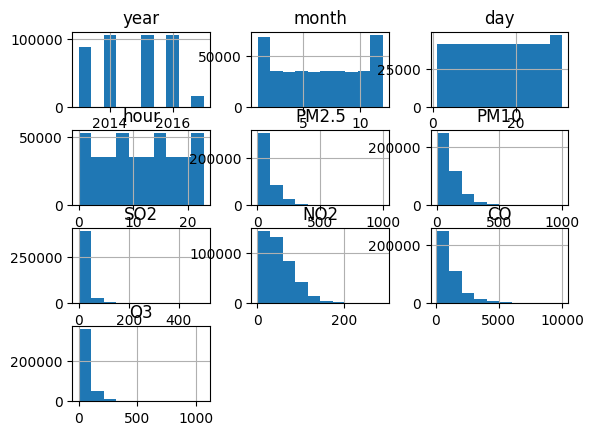

In [27]:
cleaned_data_semua_area.hist()

🍁
semua polutan left skewed. masuk akal.  
    
year waras, ada 5 tahun.  
    
monthnya... knp ga rata? knp banyakan jan des daripada yg laen???   
day waras ish... knp ada day yg mbludak dikit? 
hour... knp ada yg lebih banyak??? harusnya rata kan??? 
meh, ntar di-aggregate juga. gpp.

🍁 penasaran, coba liat korelasi antarpolutan ah!🍂

Text(0.5, 1.0, 'korelasi antarpolutan')

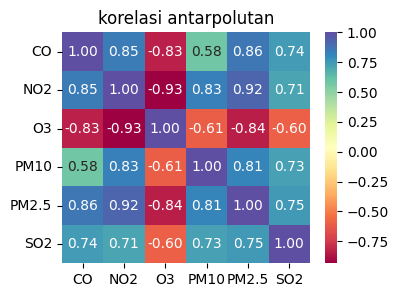

In [28]:
# bikin matriks korelasi dari rata2 tiap polutan
matriks_korelasi = cleaned_data_semua_area.groupby("month")[["CO", "NO2", "O3", "PM10", "PM2.5", "SO2"]].mean().corr()

# heatmap
fig = mpl.figure(figsize=(4,3))
sb.heatmap(matriks_korelasi, annot=True, cmap="Spectral", fmt=".2f")
mpl.title("korelasi antarpolutan")

In [29]:
#fig.savefig("mo_pamer_dataviz/0_matriks_korelasi", dpi=300, bbox_inches='tight')
mpl.show()

🍁wao, pas yg laen ikutan naik, O3 yg turun sendiri. 

tapi korelasi bukan berarti sebab-akibat sih? 🍂

#### 🍁🍁 nyoba viz harian buat plot waktu🍁🍁

In [30]:
data_harian = cleaned_data_semua_area.copy()
data_harian['daystamp'] = pd.to_datetime(data_harian[['year', 'month', 'day']])
data_harian = data_harian.groupby(['station','daystamp']).mean()
print(data_harian)

                            year  month   day  hour       PM2.5        PM10  \
station       daystamp                                                        
Aotizhongxin  2013-03-01  2013.0    3.0   1.0  11.5    7.125000   10.750000   
              2013-03-02  2013.0    3.0   2.0  11.5   30.750000   42.083333   
              2013-03-03  2013.0    3.0   3.0  11.5   76.916667  120.541667   
              2013-03-04  2013.0    3.0   4.0  11.5   22.708333   44.583333   
              2013-03-05  2013.0    3.0   5.0  11.5  148.875000  183.791667   
...                          ...    ...   ...   ...         ...         ...   
Wanshouxigong 2017-02-24  2017.0    2.0  24.0  11.5   39.958333   48.916667   
              2017-02-25  2017.0    2.0  25.0  11.5    9.145833   15.895833   
              2017-02-26  2017.0    2.0  26.0  11.5   28.520833   44.604167   
              2017-02-27  2017.0    2.0  27.0  11.5   72.875000   92.500000   
              2017-02-28  2017.0    2.0  28.0  11.5 

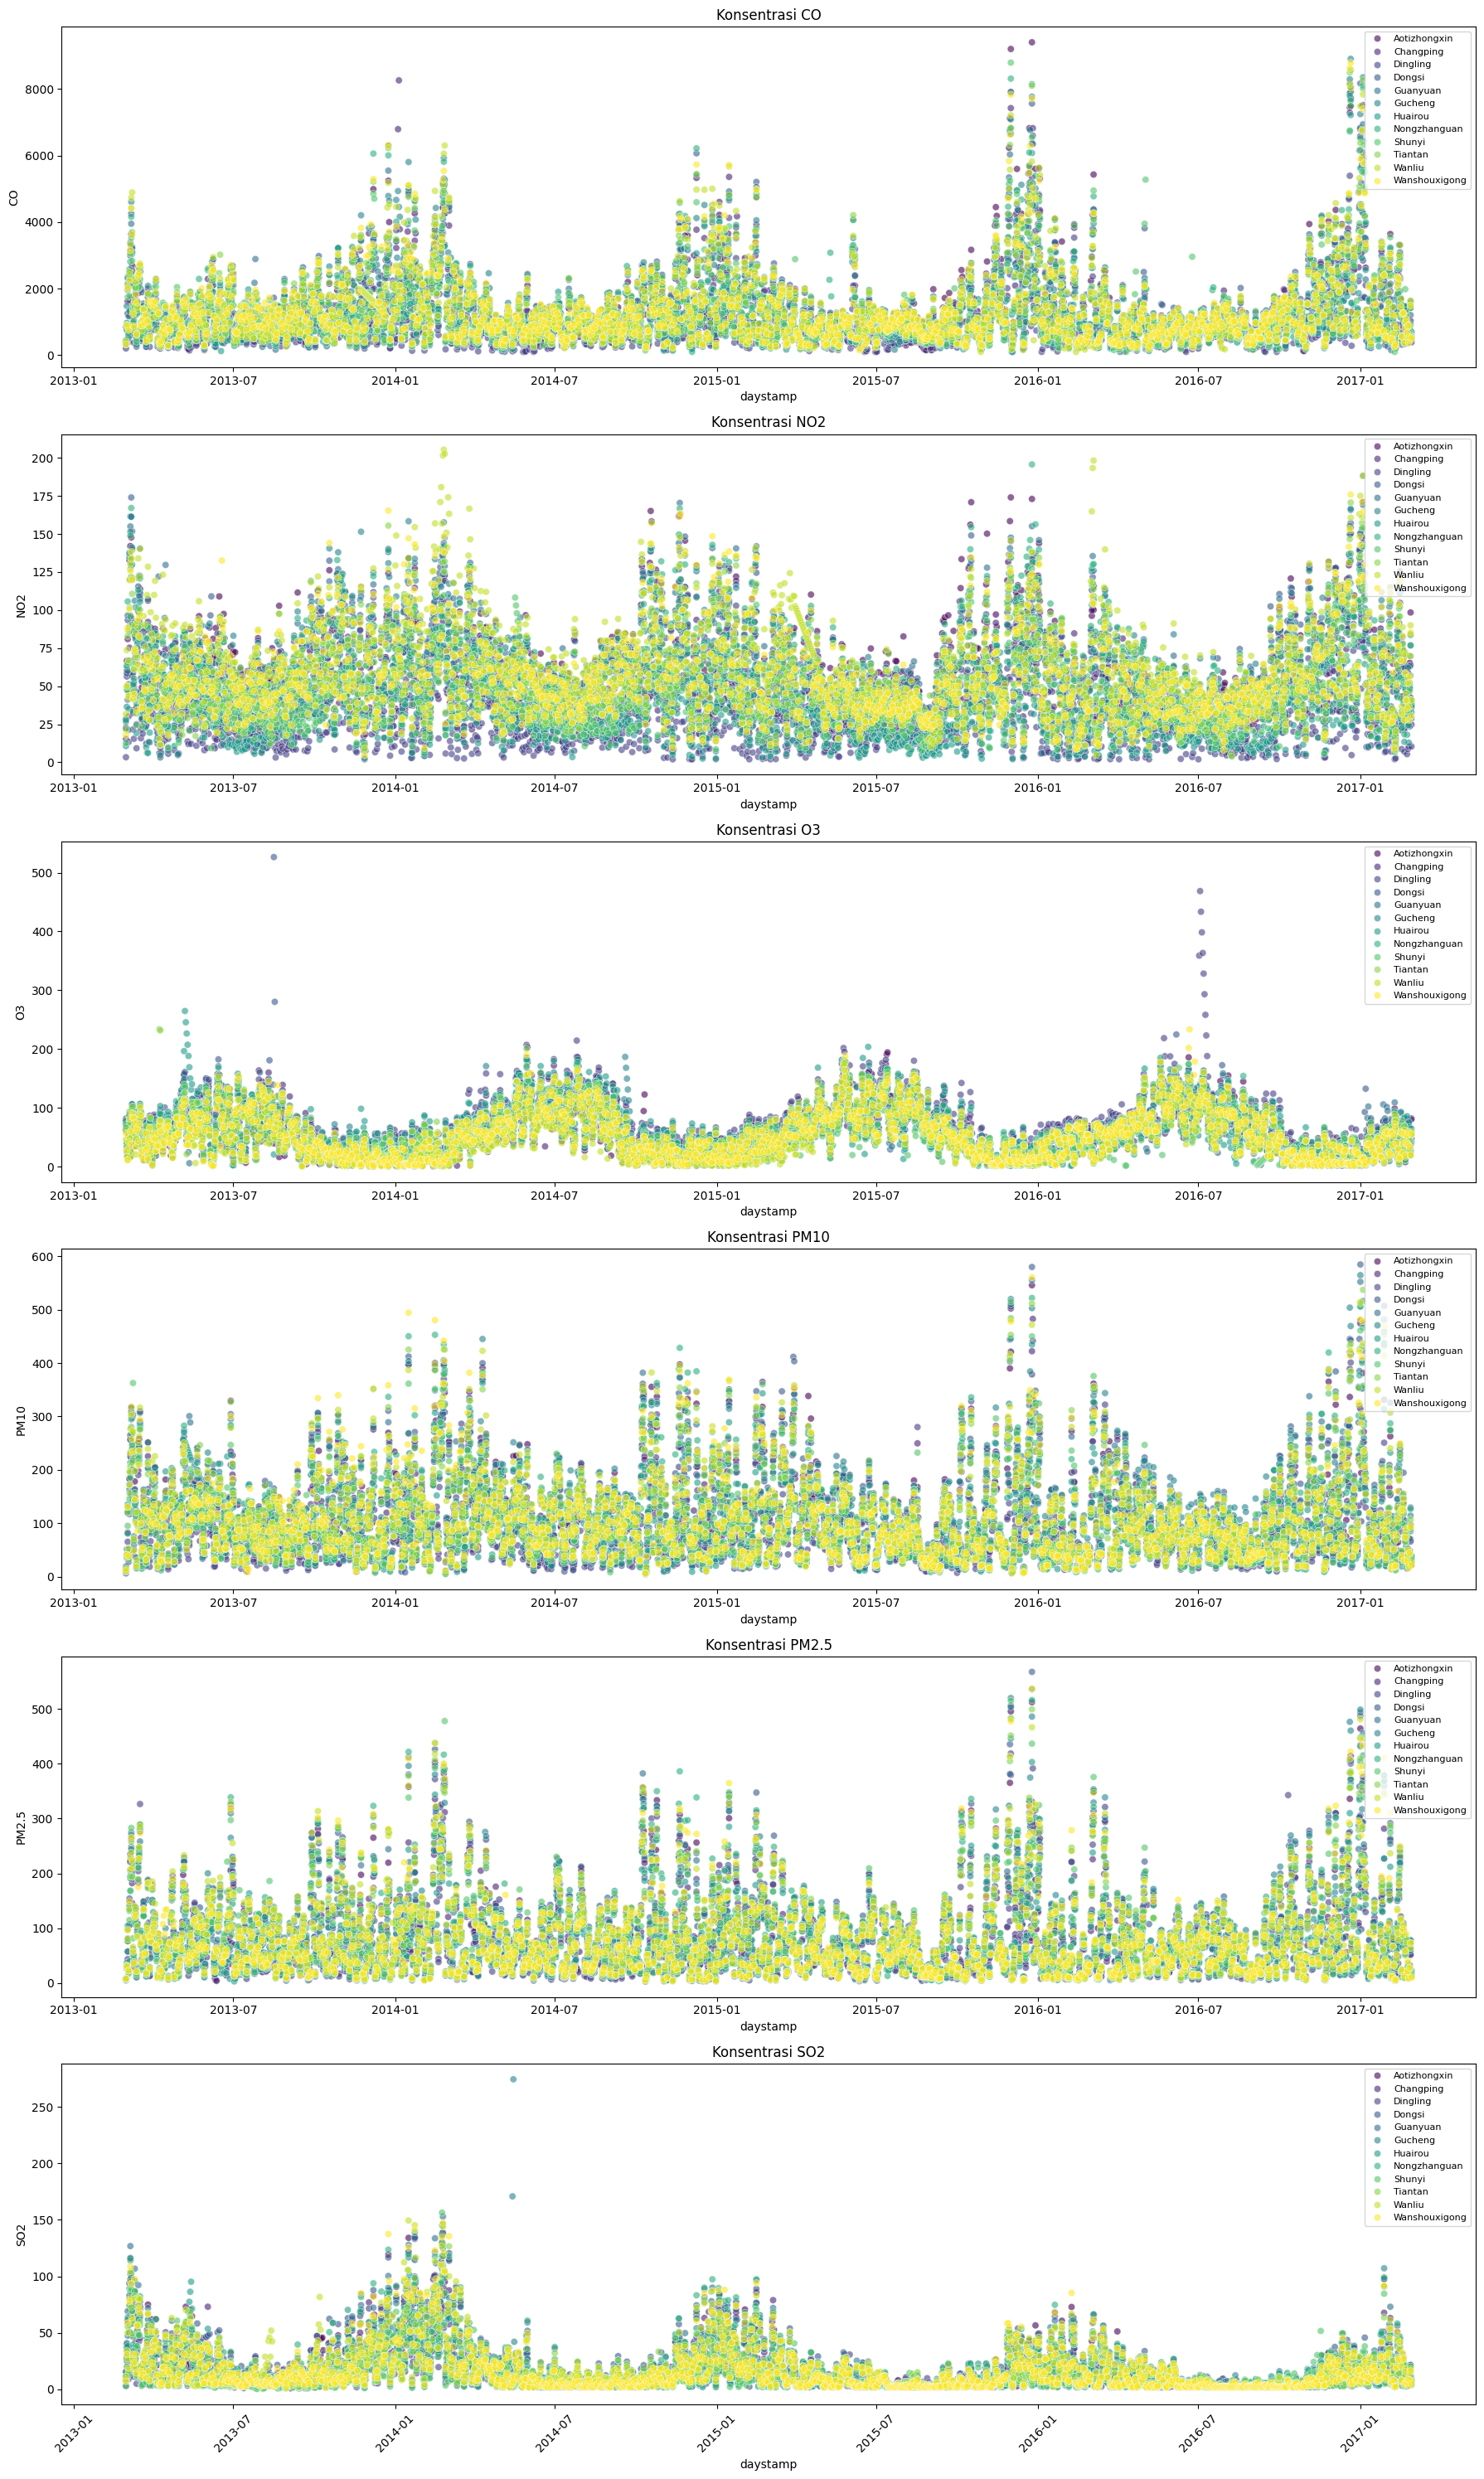

In [31]:
#===== bikin function supaya modular.
def scatterplot_timeline(axnya, datanya, yg_digambarnya, colormapnya):
    sb.scatterplot(
        data=datanya, 
        x="daystamp", 
        y=yg_digambarnya, 
        hue="station", 
        alpha=0.6, 
        palette=colormapnya, 
        ax=axnya
    )
    axnya.set_title(f"Konsentrasi {yg_digambarnya}")
    axnya.set_ylabel(yg_digambarnya)
    axnya.legend(loc="upper right", fontsize=8)

#===================
key_stasiun_data = cleaned_data_semua_area["station"].unique()
key_polutan_data = ["CO","NO2","O3", "PM10", "PM2.5", "SO2" ]

# palet warna per stasiun
viridis_colors = [mcolors.to_hex(c) for c in mpl.cm.viridis(np.linspace(0, 1, len(key_stasiun_data)))]
station_color_map = dict(zip(key_stasiun_data, viridis_colors))

# plot
fig, axes = mpl.subplots(nrows= len(key_polutan_data), ncols=1, figsize=(18, 30))
axes = axes.flatten()

for i, tiap_polutan in enumerate(key_polutan_data):
    scatterplot_timeline(axes[i], data_harian, tiap_polutan, station_color_map)

mpl.xticks(rotation=45)
mpl.tight_layout()


In [32]:
#fig.savefig("mo_pamer_dataviz/2_scatterplot_harian_polutan_vs_time", dpi=300, bbox_inches='tight')
mpl.show()

🍁WAH! polutannya musiman nih?! :D
kyknya perlu bulanan?  
btw, serius, kyk ombak, grafik polutannya. bisa gitu ya?🍂

#### 🍁🍁 nyoba viz bulanan buat plot musim 🍁🍁

🍁gonna cari relasi antarpolutan sm bulan, tapi bukan yg linier coz dia punya periode kyk gelombang. soo polar plot🍂

In [33]:
data_bulanan = cleaned_data_semua_area.copy()
data_bulanan = data_bulanan.groupby(['station','month']).mean().reset_index()
data_bulanan

station  month         year        day  hour       PM2.5  \
0     Aotizhongxin      1  2015.500000  16.000000  11.5   92.414180   
1     Aotizhongxin      2  2015.504425  14.628319  11.5   87.214049   
2     Aotizhongxin      3  2014.500000  16.000000  11.5   99.936761   
3     Aotizhongxin      4  2014.500000  15.500000  11.5   78.473785   
4     Aotizhongxin      5  2014.500000  16.000000  11.5   67.337399   
..             ...    ...          ...        ...   ...         ...   
139  Wanshouxigong      8  2014.500000  16.000000  11.5   55.105847   
140  Wanshouxigong      9  2014.500000  15.500000  11.5   61.757569   
141  Wanshouxigong     10  2014.500000  16.000000  11.5   92.962870   
142  Wanshouxigong     11  2014.500000  15.500000  11.5  104.881875   
143  Wanshouxigong     12  2014.500000  16.000000  11.5  121.722681   

           PM10        SO2        NO2           CO         O3  
0    113.627386  34.903226  65.716700  1944.438844  27.142305  
1    105.727876  31.686025  54.344395  1467.348820  43.218105  
2    150.492507  31.676069  63.294524  1372.356015  47.291080  
3    131.610069  16.439925  52.765205   844.499653  64.546367  
4    115.376714  16.012332  48.965222   792.146841  88.450649  
..          ...        ...        ...          ...        ...  
139   76.362567   4.198411  42.539801   986.928763  89.507993  
140   88.470069   6.724386  52.442309  1086.931160  54.765998  
141  117.759577   7.929642  67.567331  1281.882647  27.727965  
142  130.457604  15.683333  66.700382  1814.375000  17.534262  
143  145.865894  29.986262  74.092148  2447.983871  18.774835  

[144 rows x 11 columns]

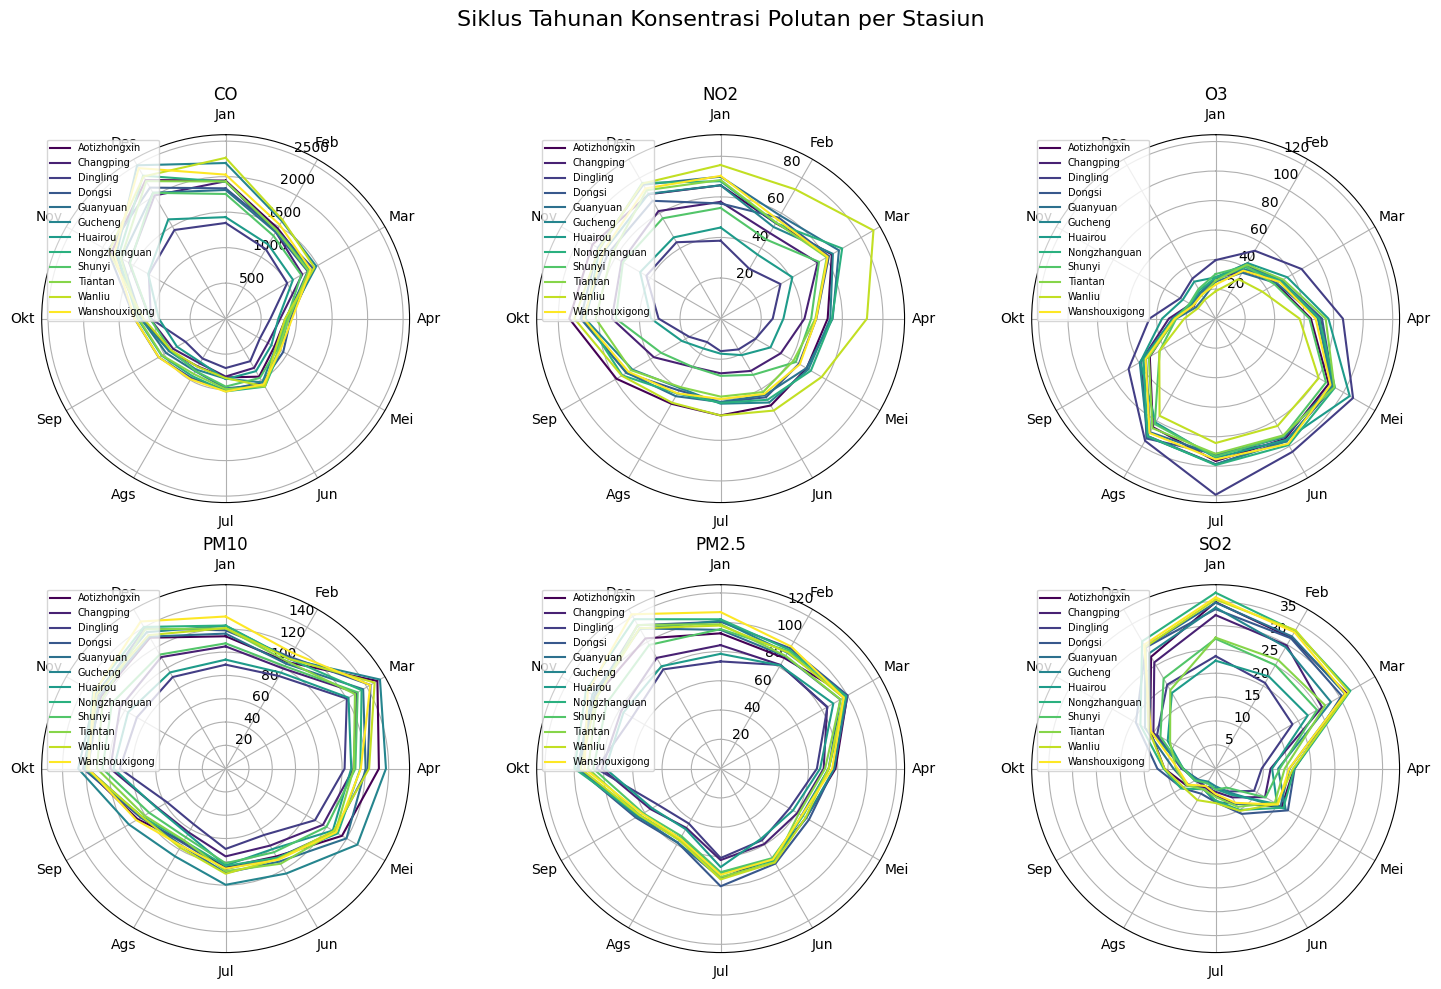

In [34]:
#=======bikin function buat satu kategori polutan
def polarplot_satu_kategori_duabelasbulan(axnya, datanya, kategorinya, key_individusnya, colormapnya):
    for tiap_stasiun in key_individusnya:
        df = datanya[datanya["station"] == tiap_stasiun].sort_values("month")
        
        theta = np.deg2rad((df["month"] - 1) * 30).values  # 12 bulan = 360 derajat
        values = df[kategorinya].values
        
        # Close the circular plot
        theta = np.append(theta, theta[0])
        values = np.append(values, values[0])
        
        axnya.plot(theta, values, label=tiap_stasiun, color=colormapnya[tiap_stasiun])
    
    axnya.set_title(kategorinya, fontsize=12)
    axnya.set_xticks(np.linspace(0, 2 * np.pi, 12, endpoint=False))
    axnya.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "Mei", "Jun", "Jul", "Ags", "Sep", "Okt", "Nov", "Des"])
    axnya.set_theta_direction(-1)
    axnya.set_theta_zero_location('N')
    axnya.legend(fontsize=7, loc="upper left")

#================
#Ambil stasiun dan polutan
key_stasiun_data = cleaned_data_semua_area["station"].unique()
key_polutan_data = ["CO", "NO2", "O3", "PM10", "PM2.5", "SO2"]

#subplot polar
fig, axes = mpl.subplots(nrows=2, ncols=3, subplot_kw={'projection': 'polar'}, figsize=(15, 10))
axes = axes.flatten()

#Colormap untuk warna stasiun
colors = [mcolors.to_hex(c) for c in mpl.cm.viridis(np.linspace(0, 1, len(key_stasiun_data)))]
station_color_map = dict(zip(key_stasiun_data, colors))

#Loop tiap polutan
for i, tiap_polutan in enumerate(key_polutan_data):
    ax = axes[i]
    polarplot_satu_kategori_duabelasbulan(ax, data_bulanan, tiap_polutan, key_stasiun_data, station_color_map)

# Title dan layout
mpl.suptitle("Siklus Tahunan Konsentrasi Polutan per Stasiun", fontsize=16)
mpl.tight_layout(rect=[0, 0, 1, 0.95])
mpl.show()



In [35]:
#fig.savefig("mo_pamer_dataviz/3_polarplot_musim_polutan.png", dpi=300, bbox_inches='tight')
mpl.show()

🍁WAH! keliatan deh cycle nya per bulannnnn! !.🍂

#### 🍁🍁 nyoba viz timeline setahunan per hari, tiap polutan lembar sendiri 🍁🍁

In [36]:
data_tanggaltahunan = data_harian.copy()
data_tanggaltahunan = data_tanggaltahunan.reset_index()
data_tanggaltahunan["datestamp"] = pd.to_datetime(data_tanggaltahunan["daystamp"]).dt.dayofyear
data_tanggaltahunan

station   daystamp    year  month   day  hour       PM2.5  \
0       Aotizhongxin 2013-03-01  2013.0    3.0   1.0  11.5    7.125000   
1       Aotizhongxin 2013-03-02  2013.0    3.0   2.0  11.5   30.750000   
2       Aotizhongxin 2013-03-03  2013.0    3.0   3.0  11.5   76.916667   
3       Aotizhongxin 2013-03-04  2013.0    3.0   4.0  11.5   22.708333   
4       Aotizhongxin 2013-03-05  2013.0    3.0   5.0  11.5  148.875000   
...              ...        ...     ...    ...   ...   ...         ...   
17527  Wanshouxigong 2017-02-24  2017.0    2.0  24.0  11.5   39.958333   
17528  Wanshouxigong 2017-02-25  2017.0    2.0  25.0  11.5    9.145833   
17529  Wanshouxigong 2017-02-26  2017.0    2.0  26.0  11.5   28.520833   
17530  Wanshouxigong 2017-02-27  2017.0    2.0  27.0  11.5   72.875000   
17531  Wanshouxigong 2017-02-28  2017.0    2.0  28.0  11.5   10.958333   

             PM10        SO2         NO2           CO         O3  datestamp  
0       10.750000  11.708333   22.583333   429.166667  63.875000         60  
1       42.083333  36.625000   66.666667   824.916667  29.750000         61  
2      120.541667  61.291667   81.000000  1620.625000  19.125000         62  
3       44.583333  22.854167   46.187500   606.250000  53.750000         63  
4      183.791667  93.875000  132.833333  2357.958333  68.458333         64  
...           ...        ...         ...          ...        ...        ...  
17527   48.916667   9.250000   52.041667   887.500000  37.458333         55  
17528   15.895833   3.270833   27.854167   375.000000  58.270833         56  
17529   44.604167   8.500000   56.500000   550.000000  34.416667         57  
17530   92.500000  16.312500   85.375000  1500.000000  20.020833         58  
17531   21.541667   4.833333   30.437500   518.750000  56.000000         59  

[17532 rows x 13 columns]

In [37]:
standar_who_ok

PM2.5  PM10         NO2         SO2      CO          O3
0   75.0   150  120.000000  125.000000  7000.0  160.000000
1   50.0   100   50.000000   50.000000  6250.0  120.000000
2   37.5    75   41.666667   46.666667  5500.0  113.333333
3   25.0    50   33.333333   43.333333  4750.0  106.666667
4   15.0    45   25.000000   40.000000  4000.0  100.000000

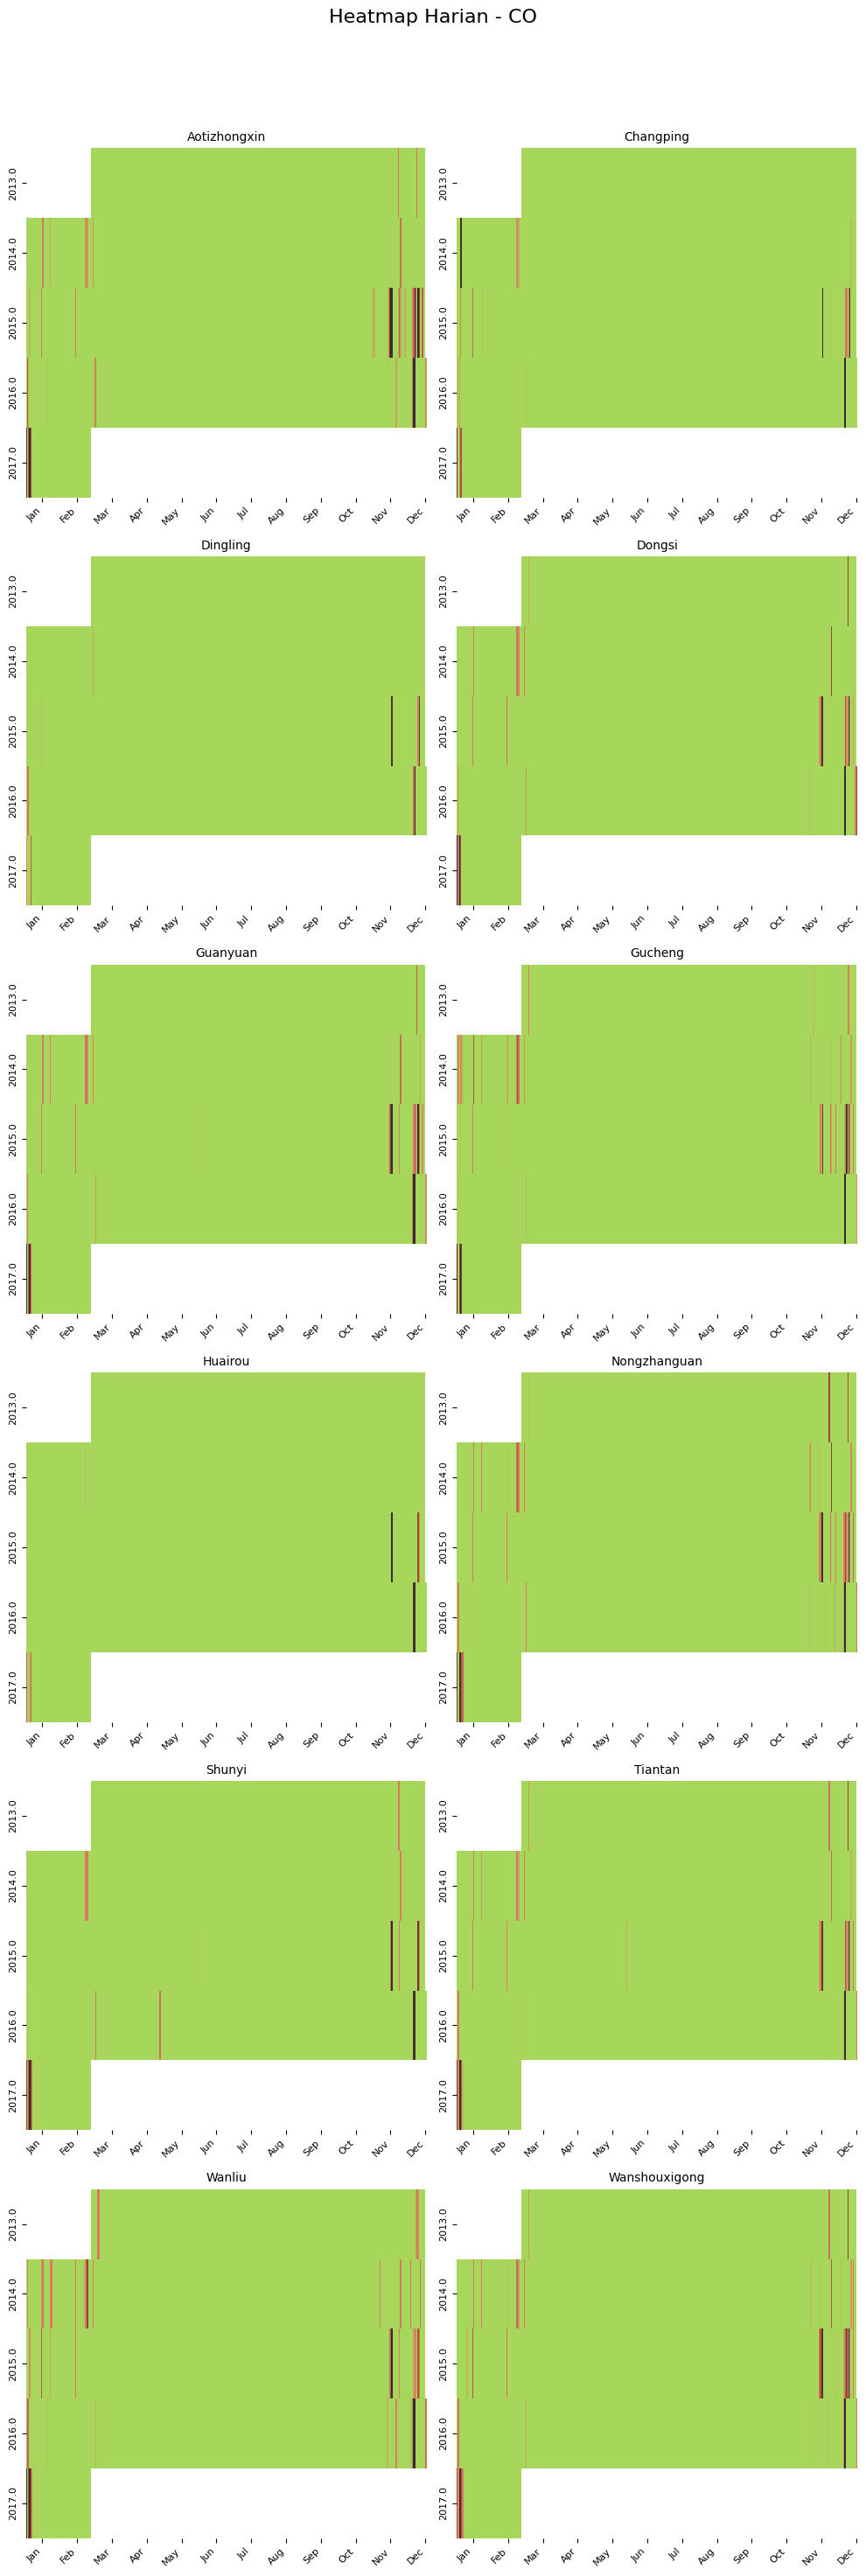

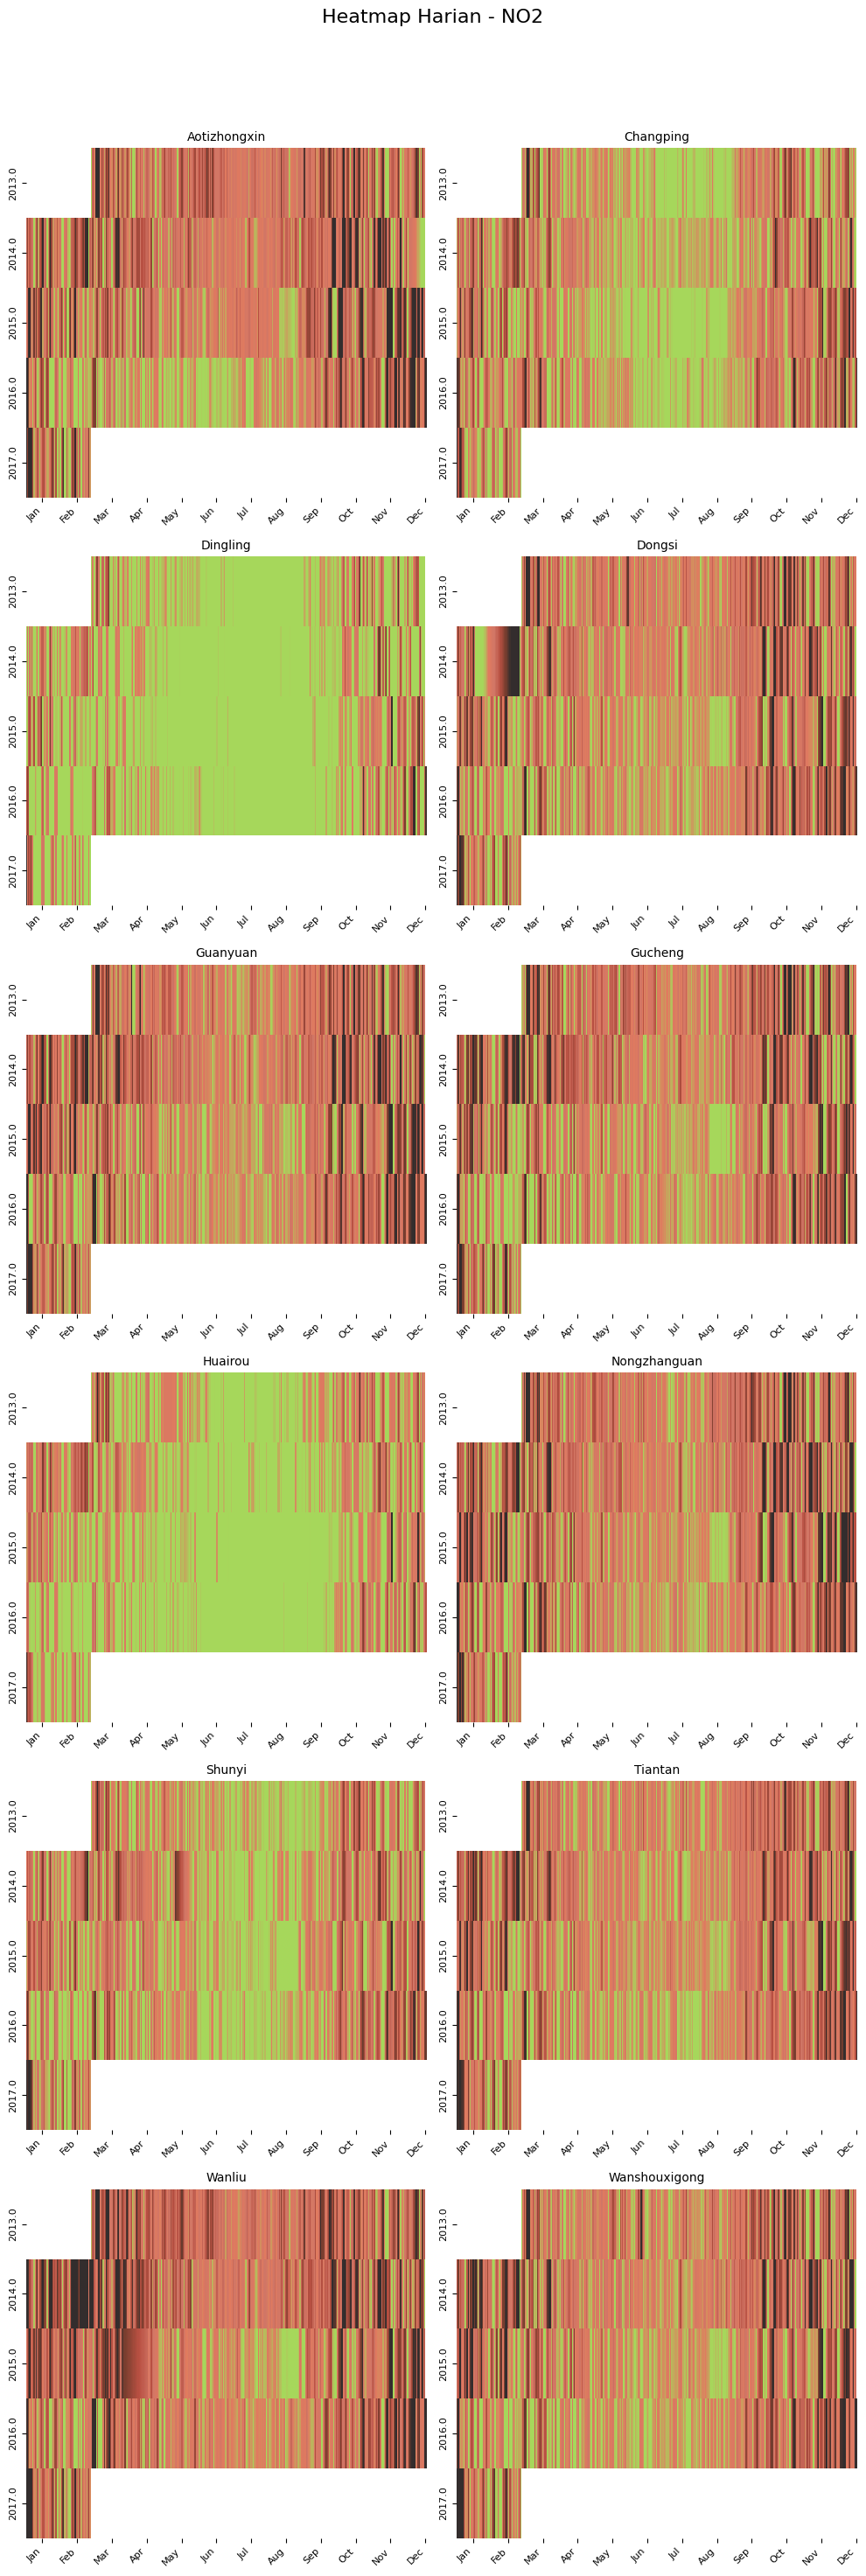

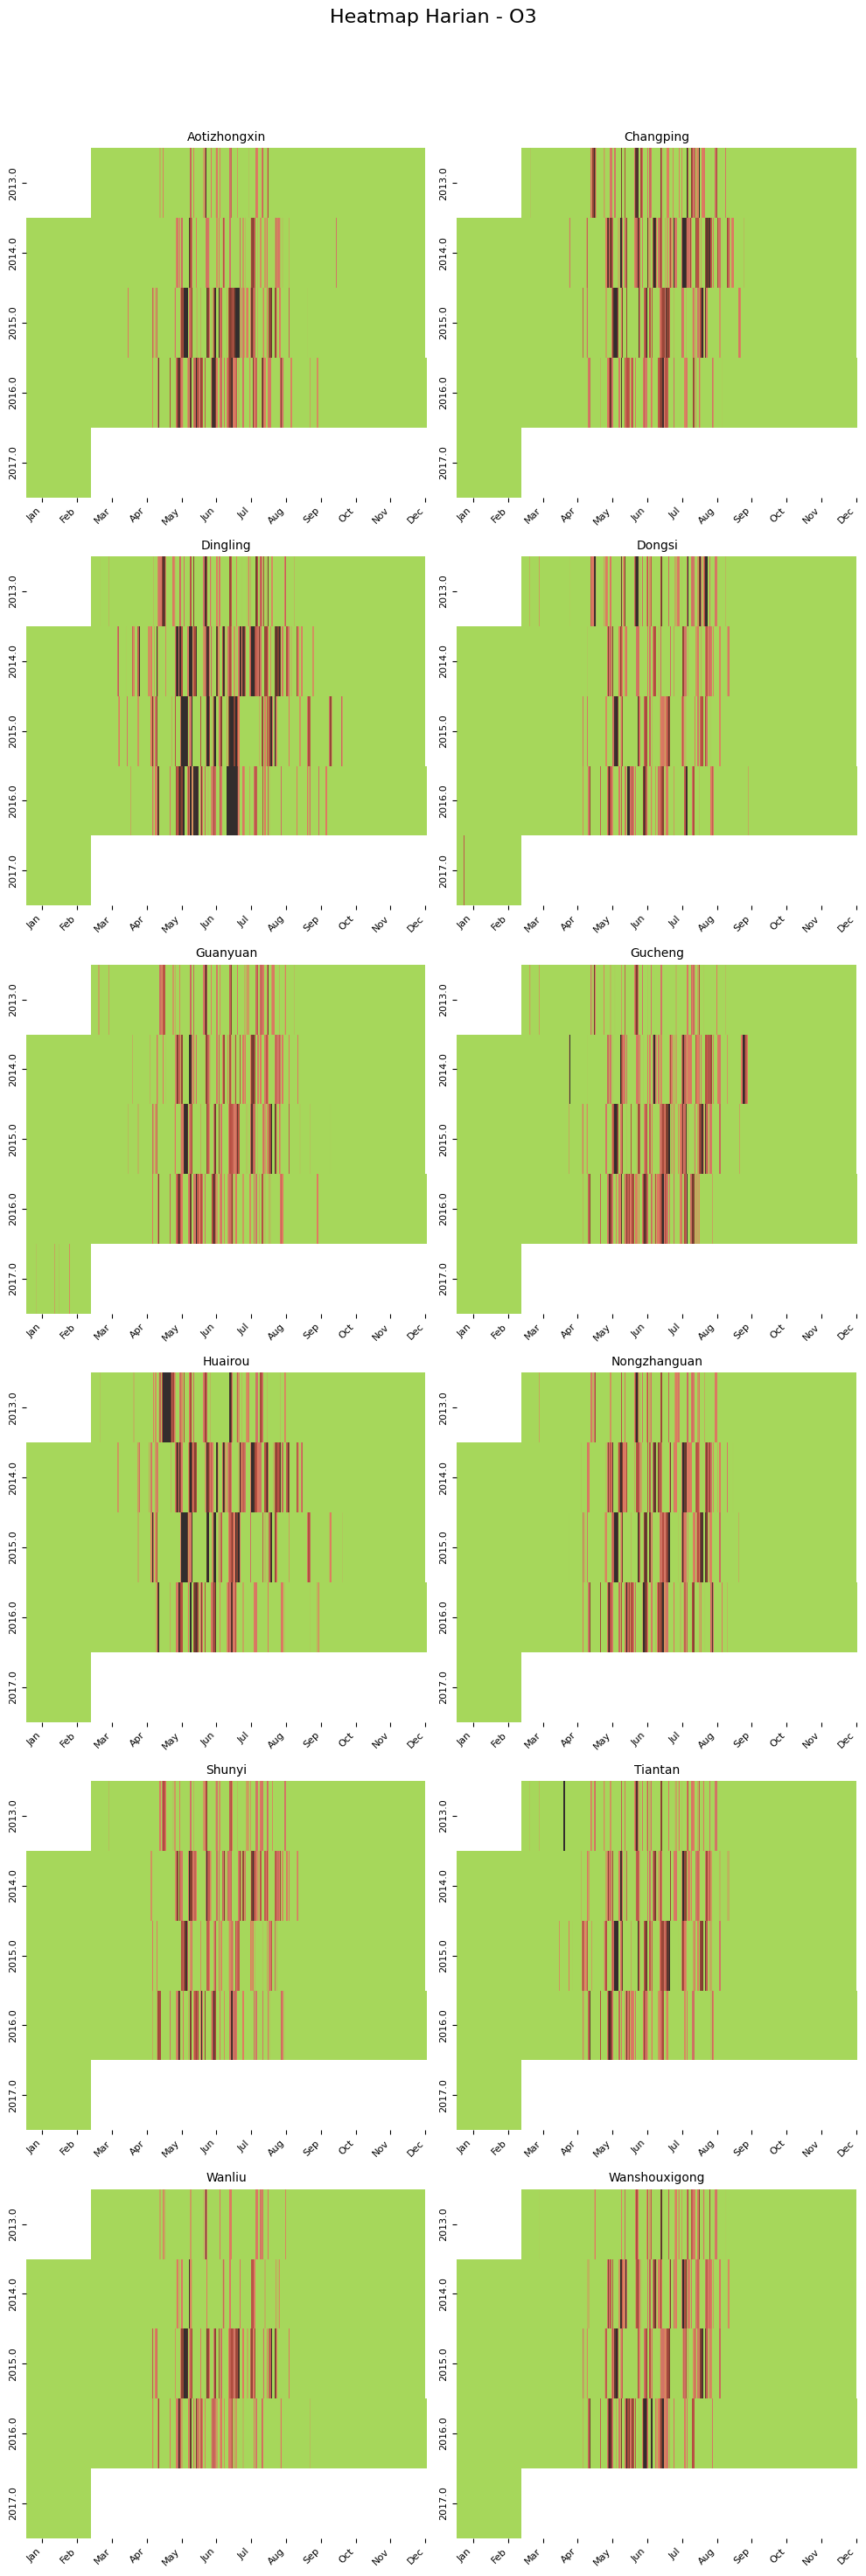

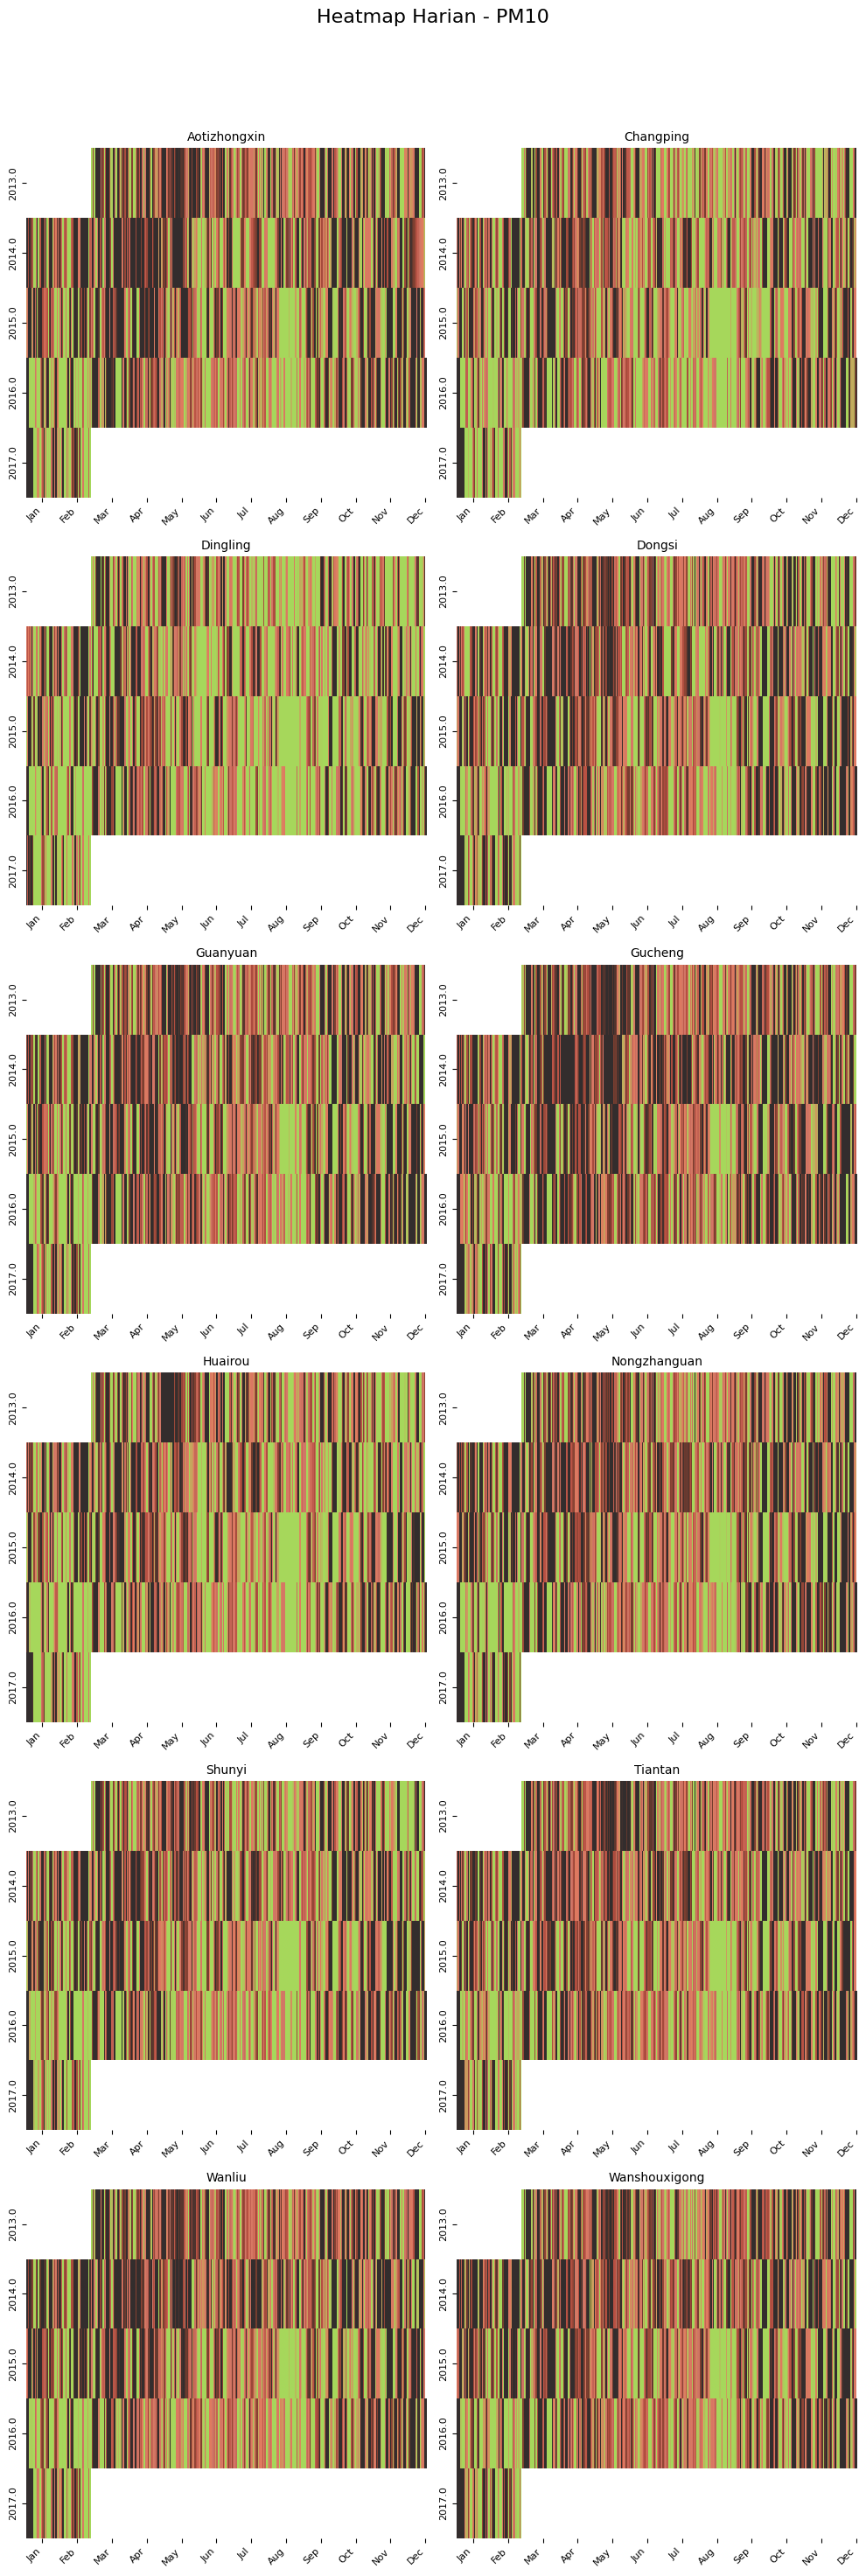

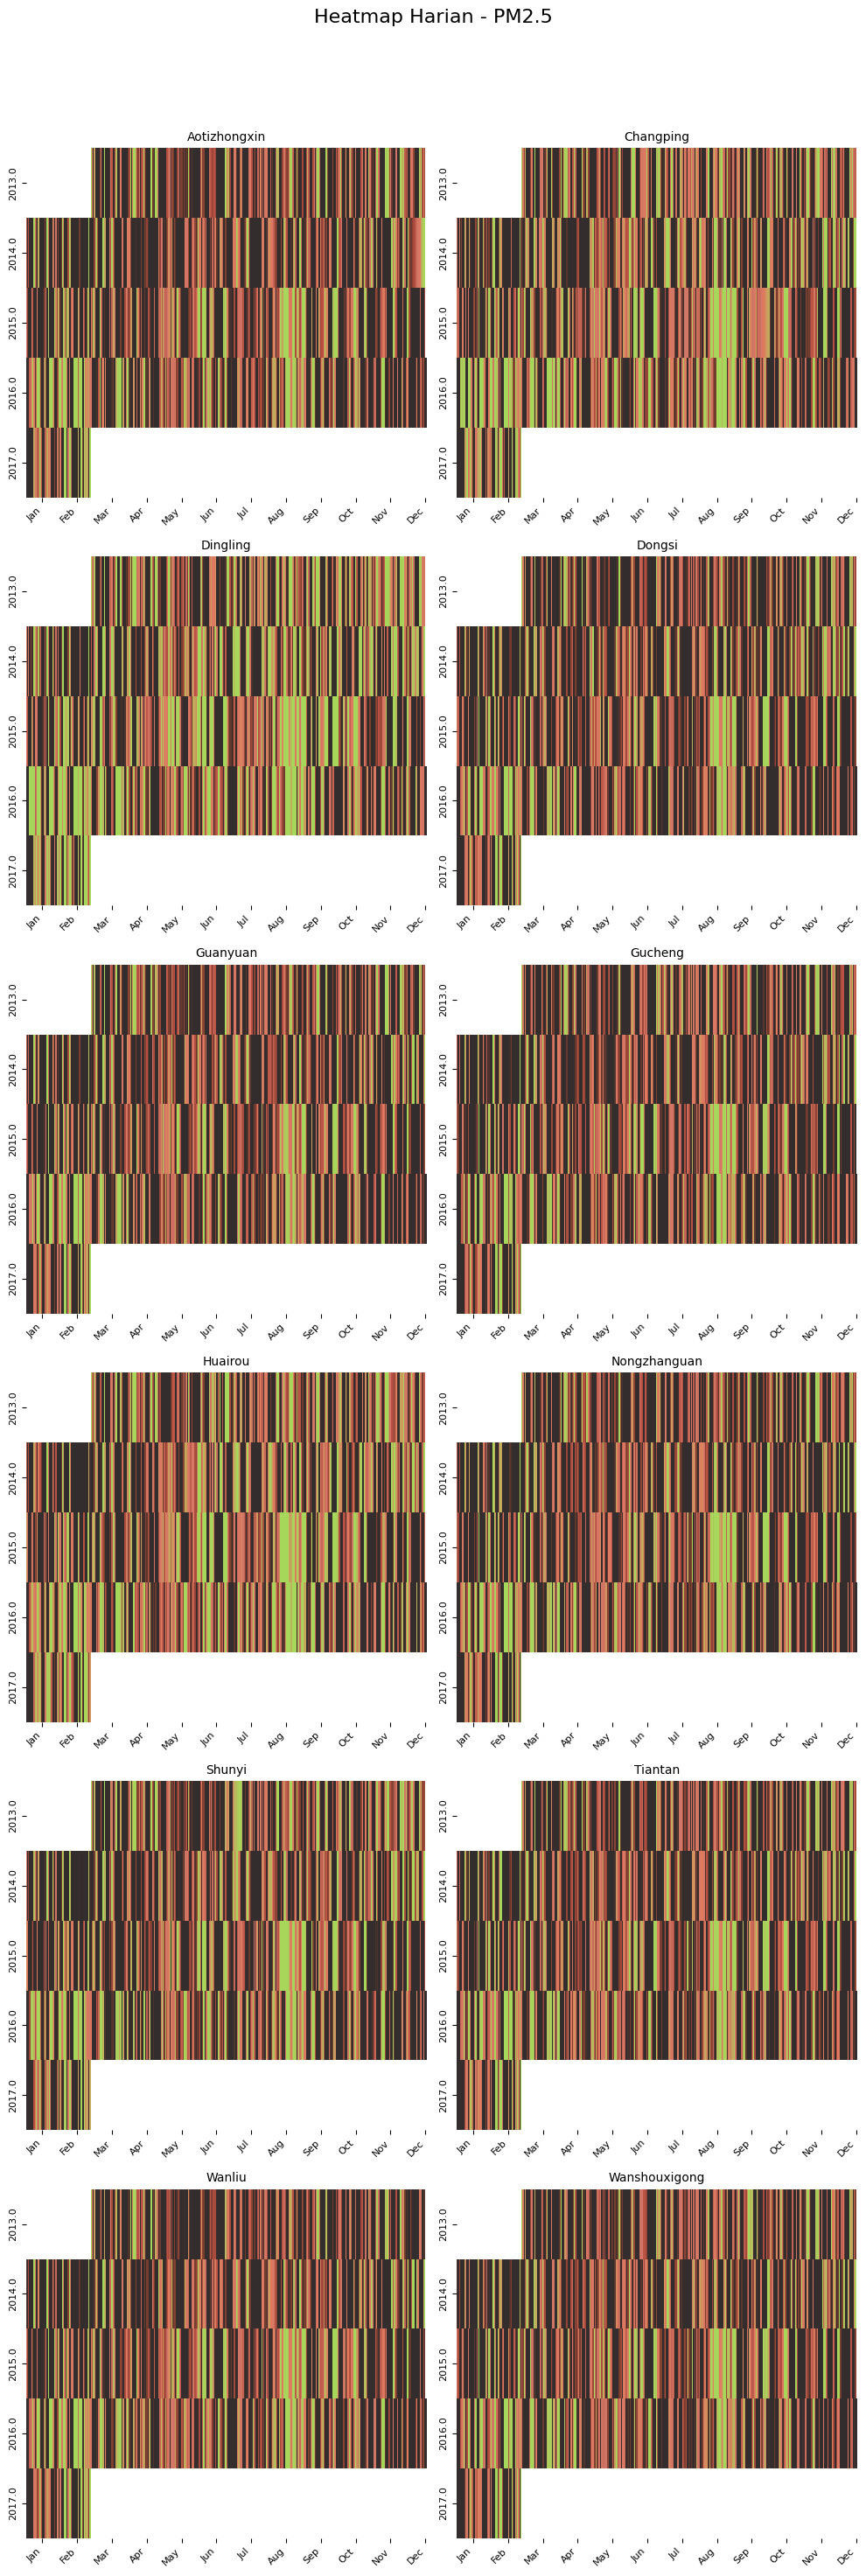

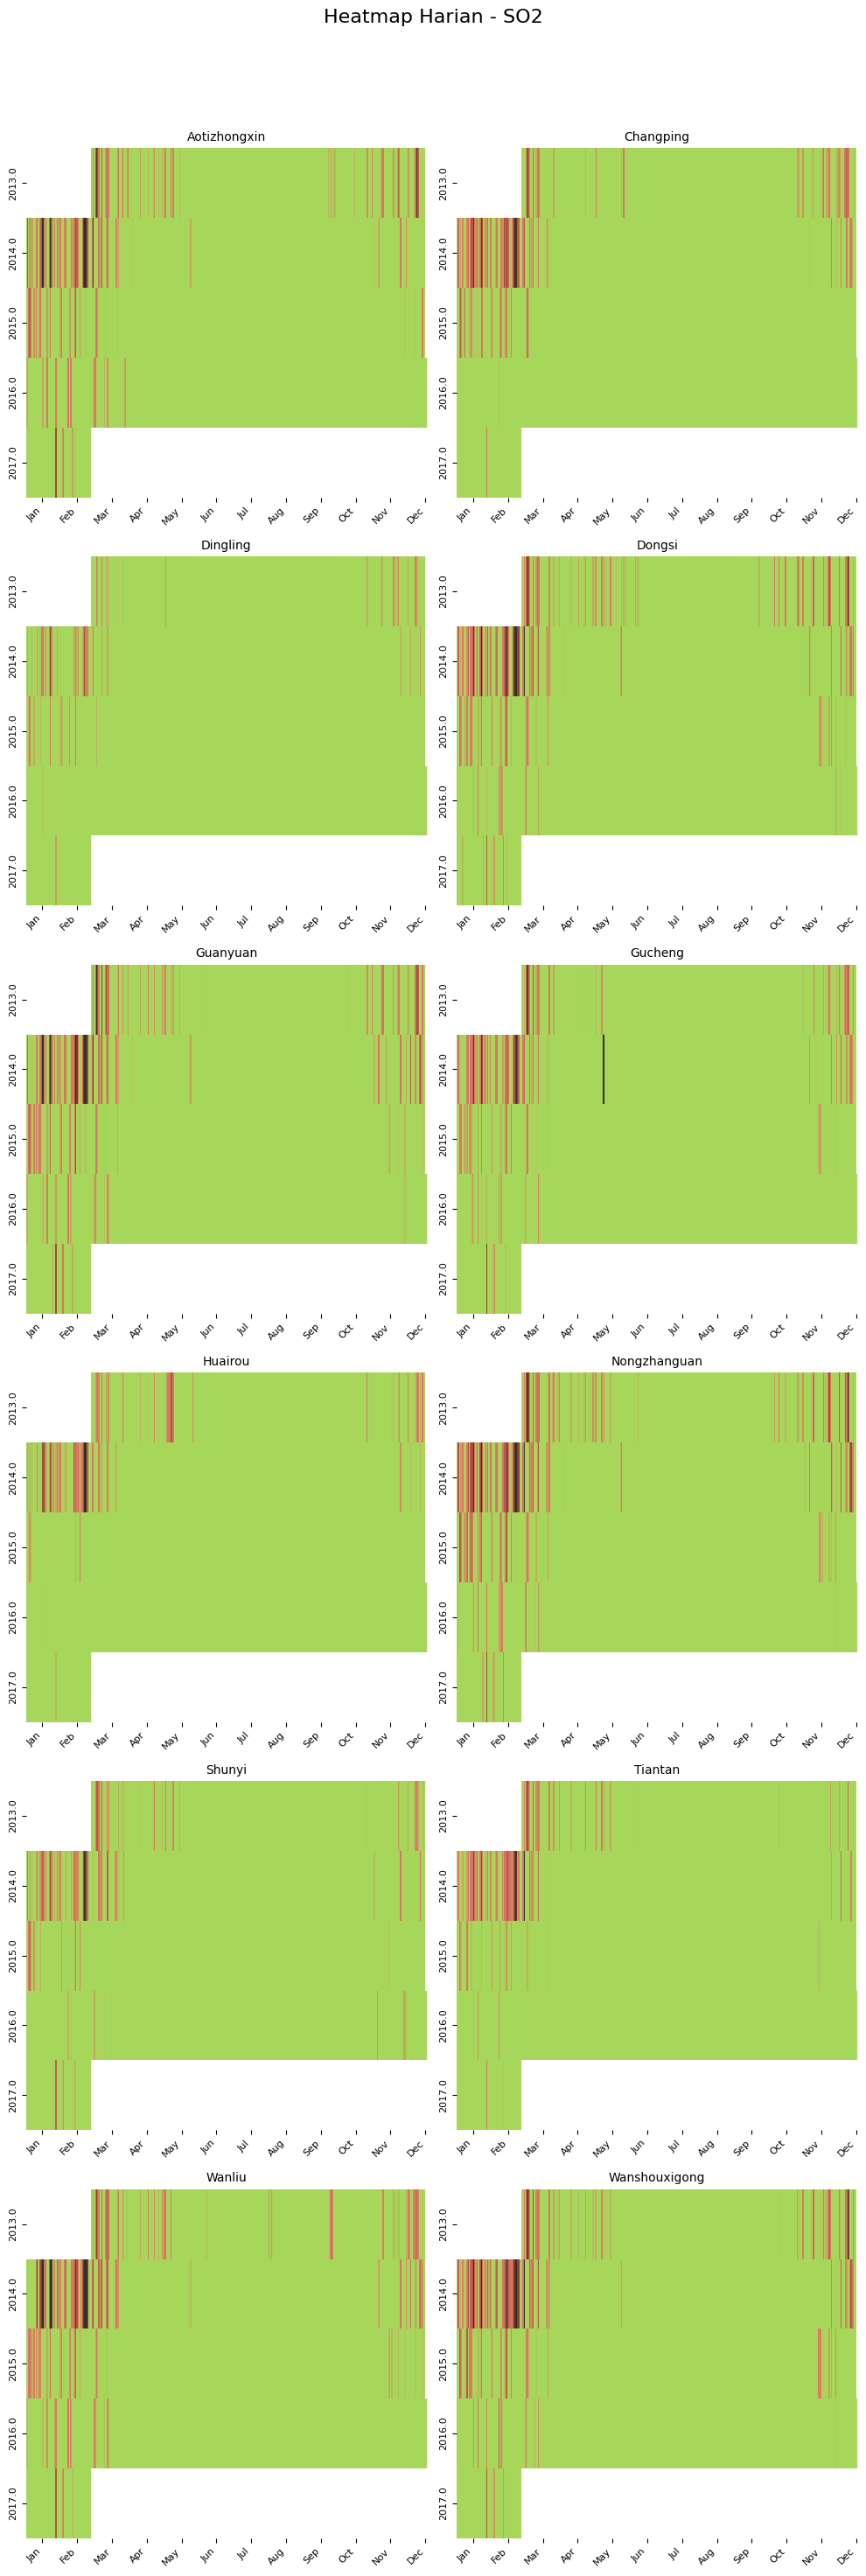

In [38]:
#====================== bikin function buat per stasiun
def heatmap_station_polutan(axnya, datanya, individunya, kategorinya, colormapnya, normalisasinya, show_cbar=False):
    pivot = datanya.pivot_table(index="year", columns="datestamp", values=kategorinya)
    mask = pivot.isna() 
    

    sb.heatmap(
        pivot, ax=axnya, cmap=colormapnya, linewidths=0, linecolor=None, norm=normalisasinya, mask=mask, cbar=show_cbar, cbar_kws={'label': pollutant} if show_cbar else None
    )

    axnya.set_title(f"{individunya}", fontsize=10)
    axnya.set_xlabel("")
    axnya.set_ylabel("")

    axnya.set_xticks(np.linspace(15, 365, 12))  # Approx. middle of each month
    axnya.set_xticklabels(
        ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
         'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
        rotation=45,
        ha='right',
        fontsize=8
    )
    axnya.tick_params(axis='y', labelsize=8)
#=================================

#Ambil stasiun dan polutan
key_stasiun_data = cleaned_data_semua_area["station"].unique()
key_polutan_data = ["CO", "NO2", "O3", "PM10", "PM2.5", "SO2"]

# Define color gradient
palet_jojo = ["#A6D75B", "#E07A5F", "#D07666", "#B85042", "#7A3E2F", "#332D2D"]
colormap_jojo = LinearSegmentedColormap.from_list("custom", palet_jojo, N=256)

for tiap_polutan in key_polutan_data:

    fig, axes = mpl.subplots(nrows=6, ncols=2, figsize=(10, 30))
    axes = axes.flatten()
    
    norm=mcolors.Normalize(vmin=standar_who_ok[tiap_polutan][4], vmax=standar_who_ok[tiap_polutan][0])

    

    
    for i, tiap_stasiun in enumerate(key_stasiun_data):
        ax = axes[i]
        temp_df = data_tanggaltahunan[data_tanggaltahunan["station"] == tiap_stasiun]
        heatmap_station_polutan(ax, temp_df, tiap_stasiun, tiap_polutan, colormap_jojo, norm)
        
    fig.suptitle(f"Heatmap Harian - {tiap_polutan}", fontsize=16)
    mpl.tight_layout(rect=[0, 0, 1, 0.95])
    mpl.show()

    filename = f"mo_pamer_dataviz/4_heatmap_tiap_statiun_yg_polutannya_{tiap_polutan}.png"
    #fig.savefig(filename, dpi=300, bbox_inches='tight')

                   


🍁 FYI... ada 72 heatmap ( 12 stasiun, 6 polutan) 
WAAAWW TERNYATA PM BANYAK YG HORROR Y. ITEM ITEM MENYALA ABANGKU.  

  di CO, NO2, O3, SO2, keliatan banget ada gradien yg berpola tiap tahun! polanya pada matching pula :D  

tapi btw, serius, klo diliat semuaan langsung, kebanyakan sih. need dashboard interaktifffff yg ada fitur filter polutan kota. 🍂

  ehem ehem, kode keras ada dashboard :p

**Insight:**
- sungguhan periodik nih datanya 
like, gradien warna & bentuk grafiknya nunjukin klo sungguhan ada musimnya. warnanya ga nyebar acak, ada polanya.

- polutan PM2.5 sama PM10 is very very dangerous... udh di atas guideline WHO hampir tiap hariiiiiiii di tiap kota :c

- butuh dashboardddddddd (tersedia di )

## Visualization & Explanatory Analysis

### Pertanyaan 1: Kapan polutan melonjak naik?

awalnya, kukira gabakal ada siklus yekan, eh ternyata ada dong.  
jadi, tiap polutan bakal mulai melonjak naik di bulan-bulan tertentu. liat aja di polar plot dah.
![polar plot nih boss](mo_pamer_dataviz/3_polarplot_musim_polutan.png)



### Pertanyaan 2: Adakah korelasi antara polutan dan waktu?  

ada. klo diliat, di grafik scatterplot, semua polutannya punya siklus. (kyk gunung2 yg interval waktunya konsisten. kyk gelombang)  

  klo penasaran spesifiknya, liat di polarplot jawaban nomor 1.
![scatterplot nih boss](mo_pamer_dataviz/2_scatterplot_harian_polutan_vs_time.png)


### Pertanyaan 3: Sesuaikah data dengan WHO global air quality guidelines?  

NAHHHH YG NOMOR 3 INI DIJAWABNYA DI ANALISIS LANJUTAN YA, SOALNYA HEATMAP HARIAN AGAK SUSAH DIRANGKUM.

**Insight:**
- IYA. ada korelasi antara  konsentrasi polutan dan waktu. konsentrasi polutannya bermusim.
- Polutannya melonjak naik di musim-musim tertentu.
- karena ngeliatin ini satu-satu susah, beneran perlu dashboard. (kodekeras ada dashboard :p) 

## Analisis Lanjutan (Opsional)

**CLUSTERING**  
ngelompokin banyak polutan yg terukur,
sesuai standar WHO yg 24-hour average.


|   | PM2.5 | PM10 |   NO2    |   SO2    |   CO   |   O3    |keterangan(g ada di dataframe)|
|---|-------|------|----------|----------|--------|---------|---------|
| 0 |  75   | 150  | 120      | 125      | 7000   | 160     |Interim Target 1|
| 1 |  50   | 100  |  50      |  50      | 6250   | 120     |Interim Target 2|
| 2 |  37.5 |  75  |  41.6667 |  46.6667 | 5500   | 113.3333 |Interim Target 3|
| 3 |  25   |  50  |  33.3333 |  43.3333 | 4750   | 106.6667 |Interim Target 4|
| 4 |  15   |  45  |  25      |  40      | 4000   | 100     |Air Quality Guidelines Level| 

ukurannya(dari paling oke ke paling horror):
| kriteria  | warna  |
|-----------|-----------|
|  **0**< x < AQG Level      |<span style="background-color: #A6D75B; color: #000;">A6D75B</span> |
| **AQG Level** < x < Interim Target 4       | <span style="background-color: #E07A5F; color: #000;">E07A5F</span>    |
| **Interim Target 4** < x <Interim Target 3    | <span style="background-color: #D07666; color: #000;">D07666</span>  |
| **Interim Target 3** < x <Interim Target 2    | <span style="background-color: #B85042; color: #000;">B85042</span>   |
| **Interim Target 2** < x <Interim Target 1   | <span style="background-color: #7A3E2F; color: #000;">7A3E2F</span>  |
| **Interim Target 1** < x   | <span style="background-color: #332D2D; color: #000;">332D2D</span>  |


In [39]:
# paling oke (ijo) ke oklah(pink-pink) ke horror (item)
palet_jojo = ["#A6D75B", "#E07A5F", "#D07666", "#B85042", "#7A3E2F", "#332D2D"]

# paling oke (di bawah AQG) ke oklah(interim) ke horror (di atas interim)
bin_labels = ["1: di bawah AQG", "2: di bawah IT4", "3: di bawah IT3", "4: di bawah IT2", "5: di bawah IT1", "6: di atas IT1"]


In [40]:
dataframe_stacked_bar_chart = data_harian.copy()
dataframe_stacked_bar_chart.drop(columns=['year','month','day','hour'], inplace=True)
dataframe_stacked_bar_chart

PM2.5        PM10        SO2         NO2  \
station       daystamp                                                    
Aotizhongxin  2013-03-01    7.125000   10.750000  11.708333   22.583333   
              2013-03-02   30.750000   42.083333  36.625000   66.666667   
              2013-03-03   76.916667  120.541667  61.291667   81.000000   
              2013-03-04   22.708333   44.583333  22.854167   46.187500   
              2013-03-05  148.875000  183.791667  93.875000  132.833333   
...                              ...         ...        ...         ...   
Wanshouxigong 2017-02-24   39.958333   48.916667   9.250000   52.041667   
              2017-02-25    9.145833   15.895833   3.270833   27.854167   
              2017-02-26   28.520833   44.604167   8.500000   56.500000   
              2017-02-27   72.875000   92.500000  16.312500   85.375000   
              2017-02-28   10.958333   21.541667   4.833333   30.437500   

                                   CO         O3  
station       daystamp                            
Aotizhongxin  2013-03-01   429.166667  63.875000  
              2013-03-02   824.916667  29.750000  
              2013-03-03  1620.625000  19.125000  
              2013-03-04   606.250000  53.750000  
              2013-03-05  2357.958333  68.458333  
...                               ...        ...  
Wanshouxigong 2017-02-24   887.500000  37.458333  
              2017-02-25   375.000000  58.270833  
              2017-02-26   550.000000  34.416667  
              2017-02-27  1500.000000  20.020833  
              2017-02-28   518.750000  56.000000  

[17532 rows x 6 columns]

**BINNING** 

Memproses polutan: CO, disimpen di dashboard/summary_stackedbarchart_CO.csv 
Memproses polutan: NO2, disimpen di dashboard/summary_stackedbarchart_NO2.csv 
Memproses polutan: O3, disimpen di dashboard/summary_stackedbarchart_O3.csv 
Memproses polutan: PM10, disimpen di dashboard/summary_stackedbarchart_PM10.csv 
Memproses polutan: PM2.5, disimpen di dashboard/summary_stackedbarchart_PM2.5.csv 
Memproses polutan: SO2, disimpen di dashboard/summary_stackedbarchart_SO2.csv 


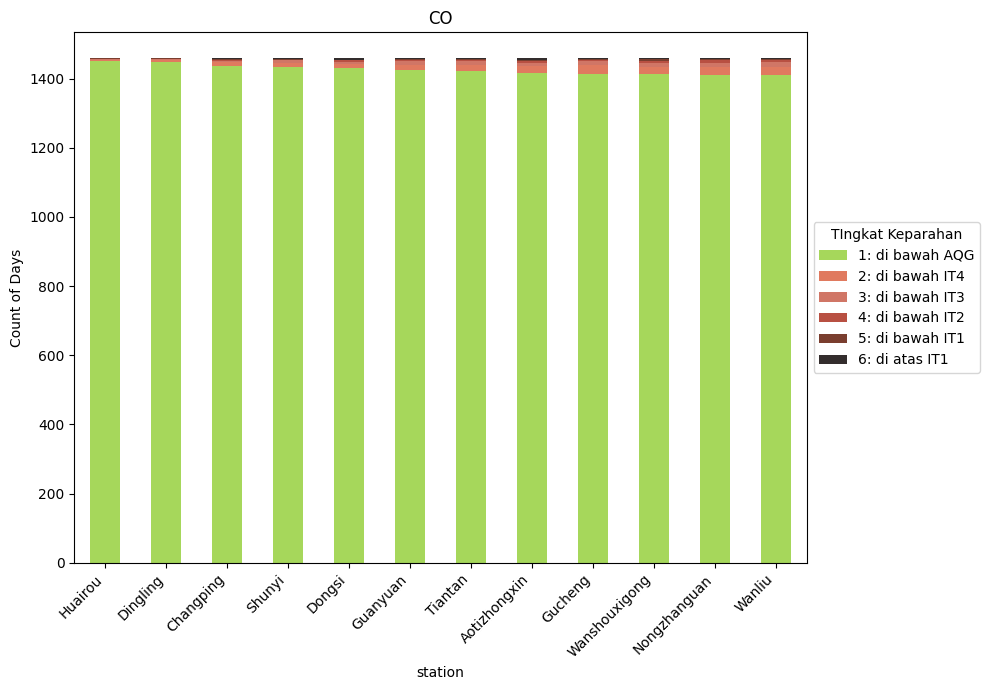

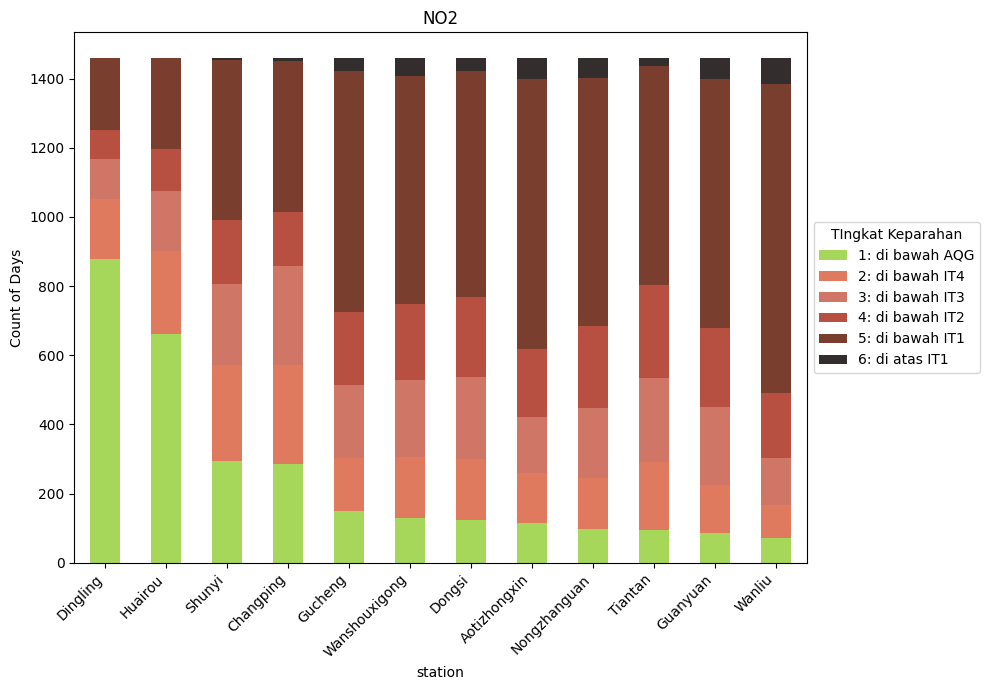

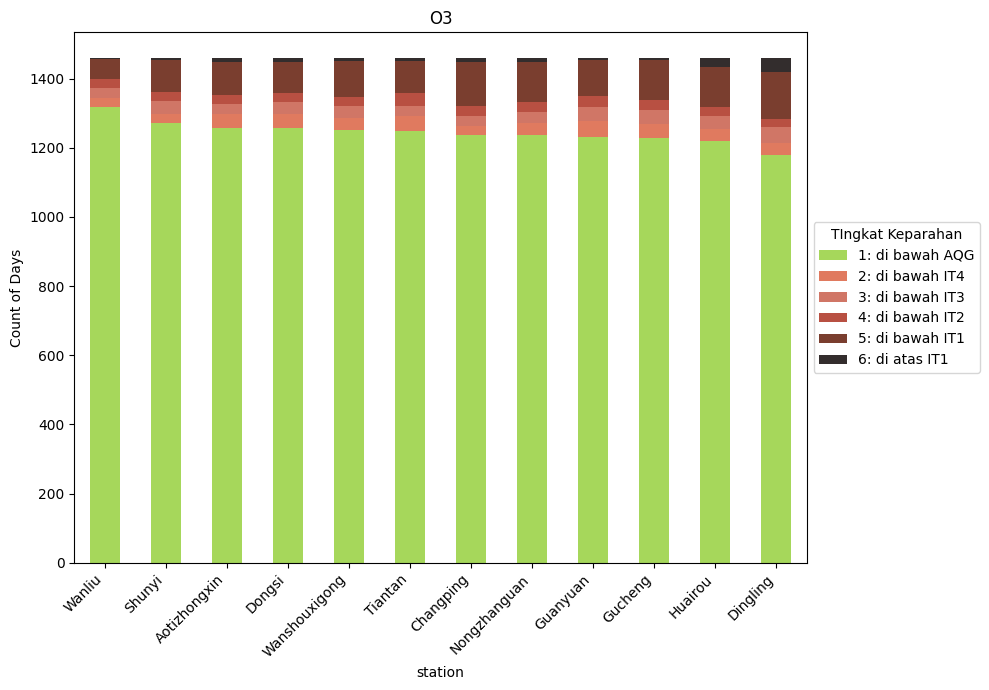

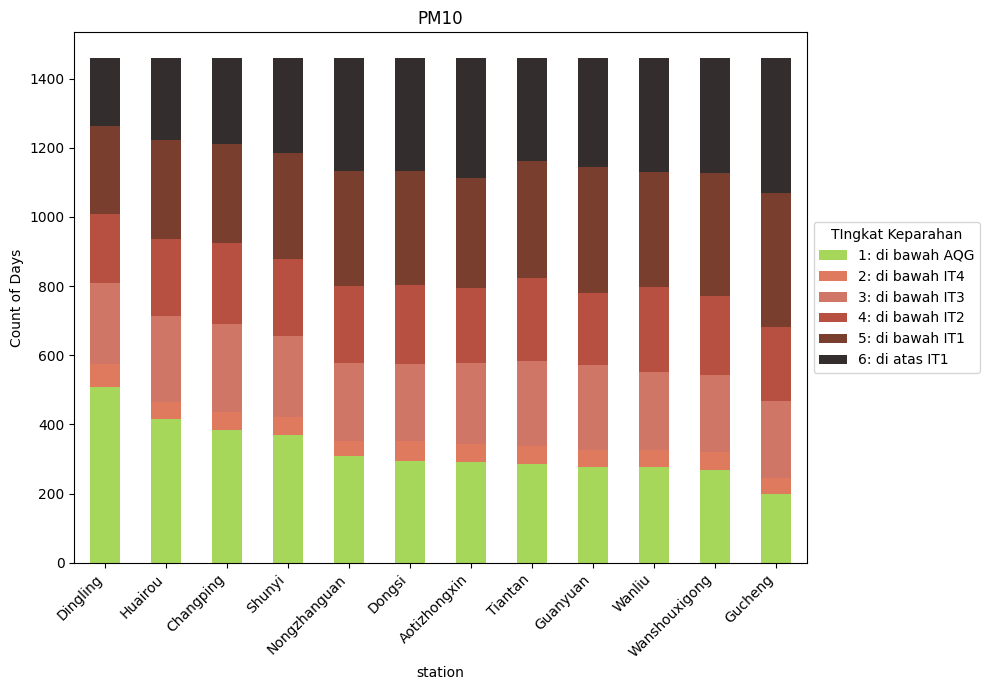

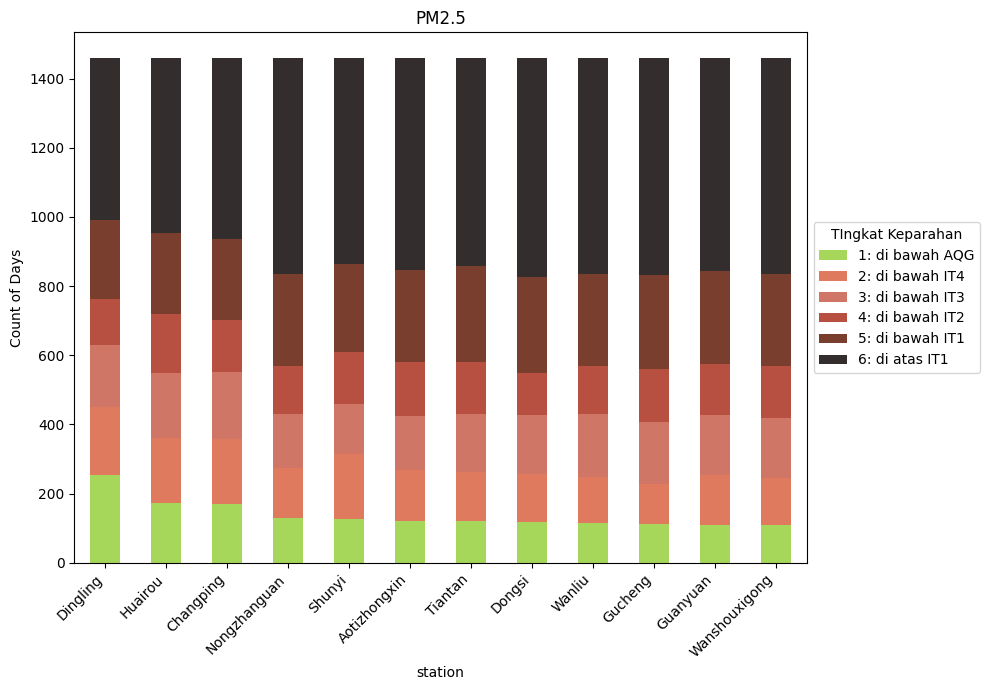

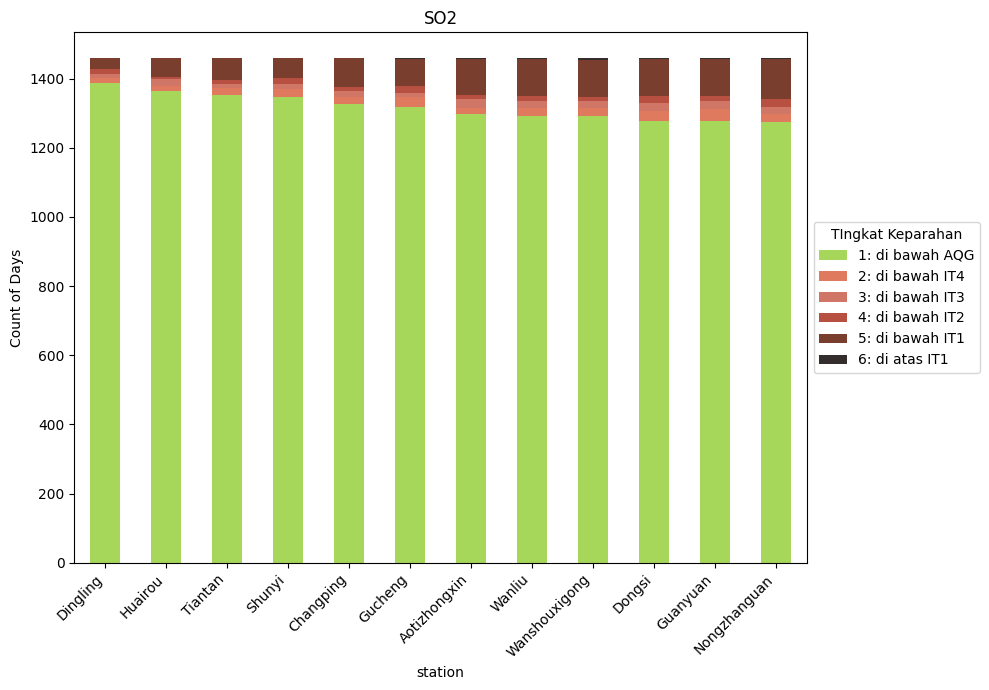

In [41]:
#================================= bikin function nggambar stacked bar chart buat tiap polutan
def stacked_bar_chart_urut( polutannya, datanya, standar_binnya, label_binnya, palet_warnanya):
    
    filename = f"dashboard/summary_stackedbarchart_{polutannya}.csv"
    print(f"Memproses polutan: {polutannya}, disimpen di {filename} ")

    # ngambil satu kolom, indexnya autokeikut. jadi mesti direset supaya jadi kolom biasa
    temp_polutannya = datanya.reset_index(name=polutannya)

    bin_edges = (
        [-np.inf] +
        standar_binnya[polutannya].sort_values().tolist() +
        [np.inf]
    )

    # ini binningnya
    temp_polutannya['bin'] = pd.cut(
        temp_polutannya[polutannya], 
        bins=bin_edges, 
        labels=label_binnya
    )

    temp_grouped_data = temp_polutannya.groupby(["station", "bin"]).size()
    temp_pivoted_data = temp_grouped_data.unstack(fill_value=0).sort_values(by= bin_labels[0] , ascending=False)

    #temp_pivoted_data.to_csv(filename)

    ax = temp_pivoted_data.plot(
        kind='bar',
        stacked=True,
        figsize=(10, 7),
        color=palet_warnanya,
        title= tiap_polutan
    )

    ax.legend(
        title='TIngkat Keparahan', 
        loc='center left', 
        bbox_to_anchor=(1, 0.5)
    )
    
    mpl.ylabel("Count of Days")
    mpl.xticks(rotation=45, ha='right')
    mpl.tight_layout()
    
    return ax

#=============

for tiap_polutan in key_polutan_data:

    temp_polutannya = dataframe_stacked_bar_chart[tiap_polutan].copy()
    stacked_bar_chart_urut(polutannya = tiap_polutan,  datanya = temp_polutannya, standar_binnya = standar_who_ok, label_binnya = bin_labels , palet_warnanya = palet_jojo)
    
    filename_chart = f"mo_pamer_dataviz/5_stacked_bar_chart_{tiap_polutan}.png"
    #fig.savefig(filename_chart, dpi=300, bbox_inches='tight')

## Conclusion

- Kapan polutan melonjak naik?
- Adakah korelasi antara polutan dan waktu?
- Sesuaikah data dengan WHO global air quality guidelines?

polutan melonjak naik pada musimnya. IYA. ADA MUSIMNYA. bisa dilihat di tabel berikut:
| Polutan  | kode warna di dashboard                                                                                              | Pola Musiman                                                                                      | Puncak Konsentrasi|
|----------|-------------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------|-----------------------------|
| **CO**   | <span style="background-color: #0d0887; color: #000;">0d0887</span>                  | konsentrasi tinggi banget di musim dingin (Nov–Jan), rendah di musim lain (Feb–Okt).                    | Desember          |
| **NO2**  | <span style="background-color: #6a00a8; color: #000;">6a00a8</span>                                    | agak rata ya, tapi nurun drastis di musim panas (Apr - Jul).                                         | Desember          |
| **O3**   |<span style="background-color: #b12a90; color: #000;">b12a90</span>                           | ini si paling anti-mainstream. tinggi di musim panas, rendah bgt di musim dingin.                   | Juni                 |
| **PM10** |<span style="background-color: #e16462; color: #000;">e16462</span>                     | muncul di dua musim, tapi nurun drastis di musim gugur.                                     | Maret          |
| **PM2.5**|<span style="background-color: #fca636; color: #000;">fca636</span>                                                   | tinggi bgt di musim dingin sampe musim semi awal. trus nurun di musim gugur.                               | Desember           |
| **SO2**  | <span style="background-color: #f0f921; color: #000;">f0f921</span>                            | puncaknya sih di musim dingin, apalagi awal tahun.                                              | Januari           |


untuk beberapa polutan, IYA! untuk CO (karbon monoksida), O3 (ozon), dan SO2 (sulfur dioksida), sudah cukup baik lah. warnanya ijo kebanyakan.  

TAPI PM2.5  PM10(particulate matter ukuran kurang dari 2.5 mikron dan 10 mikron), belom banget :''c MASIH BAHAYA huhuhuhu.  

meski deminian, at least, NO2 (nitrogen dioksida) lumayan lah, udah hampir semuanya masuk interim.  



  SEKIAN ANALISIS KUALITAS UDARA DI BEIJING nya. terimakasih udah liat2 :D 

-- salam lega krn selesai juga akhirnya,  
jojo 